<a id= 'Table-of-Contents' ></a>
# Table of Contents:
1. [Imports](#Imports)
2. [Read In Data](#Read-In-Data)
3. [Group Values](#Group-Values)
4. [Plotting](#Plotting)
    1. [Capture Times](#Capture-Times)
        1. [Capture Times, No NaN](#Capture-Times-NoNan)
        2. [Capture Times, 120s Cutoff](#Capture-Times-120s)
        3. [Capture Times, 300s Cutoff](#Capture-Times-300s)
    2. [Capture Durations](#Capture-Durations)
        1. [Capture Durations, No NaN](#Capture-Durations-NoNan)
        2. [Capture Durations, 120s Cutoff](#Capture-Durations-120s)
        3. [Capture Durations, 300s Cutoff](#Capture-Durations-300s)
    3. [Latencies](#Latencies)
        1. [Approach Latency, Non NaN](#Approach-Latency-NoNan)
        2. [Approach Latency, 120s Cutoff](#Approach-Latency-120s)
        3. [Approach Latency, 300s Cutoff](#Approach-Latency-300s)
        4. [Intercept Latency, Non NaN](#Intercept-Latency-NoNan)
        5. [Intercept Latency, 120s Cutoff](#Intercept-Latency-120s)
        6. [Intercept Latency, 300s Cutoff](#Intercept-Latency-300s)
    4. [Mouse 0896](#Mouse-0896)
    5. [Mouse 0897](#Mouse-0897)
    6. [Mouse 0898](#Mouse-0898)
    7. [By Session ID](#Session-ID)
    8. [Speed](#Speed)
    9. [Distributions](#Distributions)
        1. [Distributions, 300s Cutoff](#Distributions-300s)
        2. [Distributions, 120s Cutoff](#Distributions-120s)
    10. [Cricket Survival Rate](#Cricket-Survival-Rate)
5. [Stats](#Stats)
    1. [ANOVA](#ANOVA)
    2. [KS-Test](#KS-Test)


<a id= 'Imports' ></a>
# Import all necessary packages and point to the files, current paths for these preliminary analyses point to h5 files on KCC
###### return to [Table of Contents](#Table-of-Contents)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from copy import deepcopy as cdc

from datetime import datetime as dt
import re
def extract_timestamps(series:pd.Series) -> pd.Series:
    timestamp = series.str.extract('_(\d{4}-[\-\d_T]*)DLC', expand=False)
    return pd.to_datetime(timestamp, format="%Y-%m-%dT%H_%M_%S")
##need to have filename column as type str in order for datetime extraction to be used, won't run on Posix type

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

h5='/Users/mollyshallow/Desktop/20221011_allmice_alltrials_LD_01.h5'
# h5_new='/Users/mollyshallow/Desktop/20220715alltrials_start_LD.h5'
# h5_old='/Volumes/molly/20220511alltrials_LD.h5'
# h5_120s='/Volumes/molly/20220603alltrials_start_LD.h5'

<a id= 'Read-In-Data' ></a>
# Read data into dataframes and create copies (for tossing out failed captures) as well as manipulations for session ID and average speed.
###### return to [Table of Contents](#Table-of-Contents)

#### Use pandas to turn h5 files into dataframes, right now working with df, df old was before newer DLC tracked files were added to the dataset, not really sure what happened with df_120s. This was supposed to be a set of calculations that cut off the data at 120s so it was only the laser on period, but that doesnt appear to have worked.

In [2]:
df_all=pd.read_hdf(h5, key='df')
# df_old=pd.read_hdf(h5_old, key='df')
# df_120s=pd.read_hdf(h5_120s, key='df')

In [3]:
df_all

,filename,folder_path,condition,laser_value,circle,dist,cricket_spd,mouse_spd,az,captureT,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-05-07_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.4692367137209918, 2.779779701312001, 3.2017...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",19.145,0.206986,4.360,0.875000,0.142857,5.350
1,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-07-02_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.757072790716952, 9.362620173911946, 9.82083...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",7.435,0.126763,0.315,0.750000,0.333333,1.970
2,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-12-42_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.0548578586351982, 1.1435315586646064, 1.217...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.665,0.039494,0.265,1.000000,1.000000,1.640
3,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-14-33_mouse-0897,1.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.447304574249497, 8.829336439003862, 10.5655...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",8.040,0.112360,2.830,0.500000,1.000000,3.460
4,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-16-01_mouse-0897,1.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.550975346948177, 5.2380705840289234, 5.6036...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.510,0.095671,4.755,1.000000,0.500000,5.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-36-44_mouse-0895,NaN,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[7.522058132266212, 10.856752087956144, 12.906...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",28.030,0.304507,2.015,0.666667,0.100000,3.575
1725,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-38-50_mouse-0895,NaN,0.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[14.264606355391132, 14.304610560575007, 17.92...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10.995,0.246957,1.615,0.666667,0.250000,2.330
1726,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-40-26_mouse-0895,NaN,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",30.835,0.186585,0.580,0.222222,0.500000,14.760
1729,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-56-17_mouse-0893,2.0,0.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.1924219234042677, 2.9813598229081495, 3.178...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",36.095,0.286885,0.190,0.214286,0.333333,29.560


#### Save out folder path column of dataframe as file list for other code bases (matlab circle gui etc)

In [5]:
with open('folderlist.txt', 'w') as f_out:
    f_out.write('\n'.join(df_all['folder_path'].astype('str')))

In [10]:
df_cohort1=df_all[df_all['filename'].str.contains('0896|0897|0898')]
df_cohort2=df_all[df_all['filename'].str.contains('0893|0895')]

In [11]:
df_cohort2

,filename,folder_path,condition,laser_value,circle,dist,cricket_spd,mouse_spd,az,captureT,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept
1215,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-22_11-08-10_mouse-0895,NaN,0.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.3176217087150919, 1.8570190514208058, 1.845...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",267.905,0.032366,5.335,0.100000,1.000000,257.310
1217,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-22_11-20-33_mouse-0895,1.0,0.0,0.0,"[nan, nan, nan, nan, 49.62218610177375, 49.678...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.9267369928494751, 1.4924057939633064, 1.806...","[nan, nan, nan, nan, 27.38299928179119, 26.500...",14.835,0.055835,8.820,0.500000,1.000000,10.390
1218,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-22_11-22-20_mouse-0895,1.0,1.0,0.0,"[51.85303408104979, 52.04172898385588, 52.0334...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.6654615519772716, 0.41352430944455465, 0.38...","[73.05416220955202, 72.00786496027092, 71.1490...",22.765,0.157928,1.690,0.400000,0.500000,5.315
1219,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-22_11-24-13_mouse-0895,1.0,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.8955106984683001, 2.5635885859960363, 5.566...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",62.265,0.092834,0.110,0.125000,1.000000,61.570
1220,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-07-22_11-27-24_mouse-0895,1.0,0.0,0.0,"[54.45104886308526, 54.41354535045804, 54.2240...","[0.24512779791107828, 0.1412882051162813, 0.14...","[4.036627131480439, 0.2856201366340601, 0.4469...","[127.78985494072444, 125.3982550170366, 109.47...",5.390,0.028789,2.555,1.000000,1.000000,3.335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-36-44_mouse-0895,NaN,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[7.522058132266212, 10.856752087956144, 12.906...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",28.030,0.304507,2.015,0.666667,0.100000,3.575
1725,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-38-50_mouse-0895,NaN,0.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[14.264606355391132, 14.304610560575007, 17.92...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10.995,0.246957,1.615,0.666667,0.250000,2.330
1726,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-40-26_mouse-0895,NaN,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",30.835,0.186585,0.580,0.222222,0.500000,14.760
1729,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-56-17_mouse-0893,2.0,0.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.1924219234042677, 2.9813598229081495, 3.178...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",36.095,0.286885,0.190,0.214286,0.333333,29.560


In [12]:
df_cohort1

,filename,folder_path,condition,laser_value,circle,dist,cricket_spd,mouse_spd,az,captureT,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-05-07_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.4692367137209918, 2.779779701312001, 3.2017...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",19.145,0.206986,4.360,0.875000,0.142857,5.350
1,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-07-02_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.757072790716952, 9.362620173911946, 9.82083...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",7.435,0.126763,0.315,0.750000,0.333333,1.970
2,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-12-42_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.0548578586351982, 1.1435315586646064, 1.217...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.665,0.039494,0.265,1.000000,1.000000,1.640
3,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-14-33_mouse-0897,1.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.447304574249497, 8.829336439003862, 10.5655...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",8.040,0.112360,2.830,0.500000,1.000000,3.460
4,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-16-01_mouse-0897,1.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.550975346948177, 5.2380705840289234, 5.6036...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.510,0.095671,4.755,1.000000,0.500000,5.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-04-29_9-18-27_mouse-0898,4.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.20844813372817927, 0.4945066787151177, 0.51...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",3.925,0.065887,0.230,0.500000,1.000000,3.160
1210,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-04-29_9-19-43_mouse-0898,4.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[9.699110757253731, 11.156615960609823, 12.180...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",11.120,0.192228,0.225,0.666667,0.250000,3.400
1211,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-04-29_9-21-11_mouse-0898,4.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[14.348375523254076, 18.32458199419022, 20.101...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",15.510,0.145578,0.085,0.500000,0.333333,6.770
1213,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-04-29_9-24-07_mouse-0898,4.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.4912950537051755, 2.657264074164104, 2.7137...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",11.885,0.156912,0.255,0.400000,0.500000,4.155


In [162]:
df_120s

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept
0,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-02-2...,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-02-2...,Condition1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[14.012931903926157, 16.45841103998438, 19.185...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",69.945,0.196893,0.175,0.777778,0.071429,7.910
1,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-02-2...,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-02-2...,Condition1,0.0,"[23.304233769804583, 23.513995388021904, 23.57...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[10.771332386653675, 11.611506992090918, 12.79...","[173.79578078788444, 168.32853083358958, 168.3...",69.310,0.237781,0.730,0.277778,0.200000,12.850
2,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-02-2...,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-02-2...,Condition1,0.0,"[21.715381070777248, 21.721281588786553, 21.72...","[0.36074291483611154, 0.7115064917078303, 0.80...","[0.16767258394997434, 0.1256581066396896, 0.21...","[148.76262093536454, 148.38440970340278, 148.3...",119.995,0.075000,6.185,0.444444,0.250000,9.675
4,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-02-2...,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-02-2...,Condition1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.41138057161378183, 0.5378076393260555, 0.72...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",46.695,0.103078,0.165,0.285714,0.500000,0.610
5,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-02-2...,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-02-2...,Condition1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.876253093269236, 9.447072818341788, 9.96988...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",27.495,0.212834,5.750,1.000000,0.100000,6.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-04-1...,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-04-1...,Condition4,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[3.5382088253352006, 3.5579035878841205, 3.516...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",34.945,0.277598,0.060,0.333333,0.200000,4.730
737,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-04-1...,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-04-1...,Condition4,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.462482842239078, 1.488112138526609, 1.60963...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",21.560,0.116225,12.000,0.600000,0.333333,19.280
738,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-04-1...,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-04-1...,Condition4,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[12.066814973701607, 13.87237568286862, 16.108...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",14.180,0.131527,2.475,0.400000,0.500000,11.800
739,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-04-1...,/mnt/ion-nas/Rig4/Molly/ZIActivation/2022-04-1...,Condition4,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.5426251488004638, 0.6258404237519565, 0.650...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",4.095,0.021708,2.490,1.000000,1.000000,4.040


#### Set data type for the filename column of the df so it can be accessed correctly to segment the df for later analysis

In [8]:
df_all['filename']=df_all['filename'].astype('str')
type(df_all['filename'][0])

str

In [38]:
df_120s['filename']=df_120s['filename'].astype('str')

NameError: name 'df_120s' is not defined

In [97]:
df_laser['filename']=df_laser['filename'].astype('str')
type(df_laser['filename'][0])

str

#### Create a new df with values over 300s removed in order to toss out failed captures.

In [7]:
nandf=cdc(df)
nans=np.where(nandf['captureT']>=300)
nanvals=nandf['captureT'].iloc[nans[0]]
nandf=nandf.replace({'captureT':nanvals.values}, np.nan)

#### Calculate capture duration as defined in Zhao et al 2019 from already calculated capture time and time to first contact. Add these values to the dataframe.

In [8]:
df['capduration']=df['captureT']-df['timetointercept']

In [9]:
nandf['capduration']=nandf['captureT']-nandf['timetointercept']

In [626]:
df_120s['capduration']=df_120s['captureT']-df_120s['timetointercept']

In [98]:
df_laser['capduration']=df_laser['captureT']-df_laser['timetointercept']

#### Create a new df with values over 120s removed in order to toss out failed captures.

In [10]:
nandf120=cdc(df)
nans=np.where(nandf120['captureT']>=120)
nanvals=nandf120['captureT'].iloc[nans[0]]
nandf120=nandf120.replace({'captureT':nanvals.values}, np.nan)
nandf120['capduration']=nandf120['captureT']-nandf120['timetointercept']

#### Series of manipulations to the df to order the sessions within each light, food and laser condition, as well as to generate mean speeds for each trial. Going forward need to index the speeds to calculate approach speed, but as of now have mean speed for each trial. 

In [14]:
copydf=cdc(df)
copydf['timestamps']=extract_timestamps(copydf['filename'])
copydf=copydf.sort_values(by=['condition', 'laser_value','timestamps'])
copydf['sessionID']=ids
copydf

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept,capduration,timestamps,sessionID
71,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,Condition1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, 9.988...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",24.740,0.241513,0.210,0.888889,0.125000,2.315,22.425,2022-02-22 08:09:38,0
73,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,Condition1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.9435794273233826, 2.3150358818697847, 2.623...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",3.950,0.105876,0.900,1.000000,0.333333,1.475,2.475,2022-02-22 08:22:39,1
74,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,Condition1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.5840676417588357, 1.5447335323554987, 1.731...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",15.035,0.107831,3.290,0.666667,0.500000,5.540,9.495,2022-02-22 08:24:46,2
75,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,Condition1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.0990857586588967, 1.8790604197626206, 1.063...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",26.765,0.182732,0.260,0.571429,0.250000,1.090,25.675,2022-02-22 08:32:47,3
76,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,Condition1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.504542091130307, 4.687903667629036, 4.95473...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",86.640,0.166806,0.265,0.411765,0.142857,1.870,84.770,2022-02-22 08:35:13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,Condition4,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.402956429933068, 15.717285427810676, 20.21...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12.620,0.061173,2.610,0.600000,0.333333,9.390,3.230,2022-04-29 08:52:35,87
855,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,Condition4,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.1946756723763203, 1.1292548825074256, 2.376...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",9.615,0.150911,0.115,1.000000,0.166667,1.240,8.375,2022-04-29 09:13:40,88
856,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,Condition4,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[3.0614839354503616, 3.04771736096993, 3.05223...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12.745,0.073814,2.705,0.250000,1.000000,12.710,0.035,2022-04-29 09:16:40,89
857,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,/Volumes/wehrlab/Rig4/Molly/ZIActivation/2022-...,Condition4,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[9.699110757253731, 11.156615960609823, 12.180...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",11.120,0.192228,0.225,0.666667,0.250000,3.400,7.720,2022-04-29 09:19:43,90


In [100]:
copydf_laser=cdc(df_laser)
copydf_laser['timestamps']=extract_timestamps(copydf_laser['filename'])
copydf_laser=copydf_laser.sort_values(by=['condition', 'laser_value','timestamps'])

cond1=copydf_laser.query('condition == "Condition1"')
cond1_0=cond1.iloc[np.where(cond1['laser_value']==0)]
cond1_1=cond1.iloc[np.where(cond1['laser_value']==1)]

cond2=copydf_laser.query('condition == "Condition2"')
cond2_0=cond2.iloc[np.where(cond2['laser_value']==0)]
print(len(cond2_0))
cond2_1=cond2.iloc[np.where(cond2['laser_value']==1)]
print(len(cond2_1))

condition1_0=np.arange(0,43)
condition1_1=np.arange(0,44)
condition2_0=np.arange(0,61)
condition2_1=np.arange(0,63)

ids=np.concatenate([condition1_0,condition1_1, condition2_0, condition2_1])

copydf_laser['sessionID']=ids
# copydf_laser

speedtest_laser=copydf_laser[['condition', 'mouse_spd', 'laser_value', 'sessionID']]
newtest_laser= speedtest_laser.explode('mouse_spd').reset_index().rename(columns={'index':'trial'})
meanspeed_laser= newtest_laser.groupby(['condition','trial', 'laser_value']).agg({'mouse_spd':np.nanmean})
meanspeed_laser=meanspeed_laser.reset_index()
meanspeed_laser

61
63


,condition,trial,laser_value,mouse_spd
0,Condition1,0,0.0,9.240311
1,Condition1,1,0.0,5.562351
2,Condition1,2,0.0,8.880557
3,Condition1,3,0.0,12.903078
4,Condition1,4,0.0,9.396163
...,...,...,...,...
206,Condition2,218,0.0,7.954177
207,Condition2,219,1.0,10.724505
208,Condition2,221,1.0,7.053063
209,Condition2,222,0.0,11.315017


In [13]:
condition1_0=np.arange(0,105)
condition1_1=np.arange(0,103)
condition2_0=np.arange(0,120)
condition2_1=np.arange(0,114)
condition3_0=np.arange(0,73)
condition3_1=np.arange(0,75)
condition4_0=np.arange(0,121)
condition4_1=np.arange(0,92)

ids=np.concatenate([condition1_0,condition1_1,condition2_0,condition2_1,condition3_0,condition3_1,condition4_0,condition4_1])

In [15]:
speedtest=copydf[['condition', 'mouse_spd', 'laser_value', 'sessionID']]
newtest= speedtest.explode('mouse_spd').reset_index().rename(columns={'index':'trial'})
meanspeed= newtest.groupby(['condition','trial', 'laser_value']).agg({'mouse_spd':np.nanmean})
meanspeed=meanspeed.reset_index()
meanspeed

,condition,trial,laser_value,mouse_spd
0,Condition1,0,0.0,10.951588
1,Condition1,1,0.0,12.884350
2,Condition1,2,0.0,4.742795
3,Condition1,4,0.0,10.143461
4,Condition1,5,0.0,9.198848
...,...,...,...,...
798,Condition4,854,1.0,7.111265
799,Condition4,855,1.0,8.953816
800,Condition4,856,1.0,5.364133
801,Condition4,857,1.0,10.242280


#### Bunch of (probably unnecessary, but can be cleaned up later) dataframe manipulations to make things more digestable/ easy to work with for the testing of distribution plotting. This first set works with data with a cutoff of 300s.

In [16]:
test=nandf[['condition','laser_value','captureT', 'capduration', 'timetoapproach','timetointercept']]

In [17]:
cond1=test.query('condition == "Condition1"')
cond2=test.query('condition == "Condition2"')
cond3=test.query('condition == "Condition3"')
cond4=test.query('condition == "Condition4"')

In [18]:
cond1_off=cond1.iloc[np.where(cond1['laser_value']==0)]
cond1_on=cond1.iloc[np.where(cond1['laser_value']==1)]

cond2_off=cond2.iloc[np.where(cond2['laser_value']==0)]
cond2_on=cond2.iloc[np.where(cond2['laser_value']==1)]

cond3_off=cond3.iloc[np.where(cond3['laser_value']==0)]
cond3_on=cond3.iloc[np.where(cond3['laser_value']==1)]

cond4_off=cond4.iloc[np.where(cond4['laser_value']==0)]
cond4_on=cond4.iloc[np.where(cond4['laser_value']==1)]

In [151]:
test_laser=df_male[['condition','laser_value','captureT', 'capduration', 'timetoapproach','timetointercept']]
cond1_laser=test_laser.query('condition == "Condition1"')

cond1_off_laser=cond1_laser.iloc[np.where(cond1_laser['laser_value']==0)]
cond1_on_laser=cond1_laser.iloc[np.where(cond1_laser['laser_value']==1)]

cond2_laser=test_laser.query('condition == "Condition2"')

cond2_off_laser=cond2_laser.iloc[np.where(cond2_laser['laser_value']==0)]
cond2_on_laser=cond2_laser.iloc[np.where(cond2_laser['laser_value']==1)]

#### Subsetting the 120s df generated from a separate h5 file.

In [19]:
### This is the df loaded from the h5 file that was supposed to have a cut off at 120s, still not entirely sure what happened with this one
### Need to double check how this cutoff was done, don't think it quite worked
test120=df_120s[['condition','laser_value','captureT', 'capduration', 'timetoapproach','timetointercept']]
cond1_120=test120.query('condition == "Condition1"')
cond2_120=test120.query('condition == "Condition2"')
cond3_120=test120.query('condition == "Condition3"')
cond4_120=test120.query('condition == "Condition4"')

NameError: name 'df_120s' is not defined

In [662]:
cond1_120off=cond1_120.iloc[np.where(cond1_120['laser_value']==0)]
cond1_120on=cond1_120.iloc[np.where(cond1_120['laser_value']==1)]

cond2_120off=cond2_120.iloc[np.where(cond2_120['laser_value']==0)]
cond2_120on=cond2_120.iloc[np.where(cond2_120['laser_value']==1)]

cond3_120off=cond3_120.iloc[np.where(cond3_120['laser_value']==0)]
cond3_120on=cond3_120.iloc[np.where(cond3_120['laser_value']==1)]

cond4_120off=cond4_120.iloc[np.where(cond4_120['laser_value']==0)]
cond4_120on=cond4_120.iloc[np.where(cond4_120['laser_value']==1)]

#### Subsetting the 120s df generated from manually (within this notebook) going and removing longer capture times like how it was done with 300s

In [20]:
newtest120=nandf120[['condition','laser_value','captureT', 'capduration', 'timetoapproach','timetointercept']]
newcond1_120=newtest120.query('condition == "Condition1"')
newcond2_120=newtest120.query('condition == "Condition2"')
newcond3_120=newtest120.query('condition == "Condition3"')
newcond4_120=newtest120.query('condition == "Condition4"')

In [21]:
newcond1_120off=newcond1_120.iloc[np.where(newcond1_120['laser_value']==0)]
newcond1_120on=newcond1_120.iloc[np.where(newcond1_120['laser_value']==1)]

newcond2_120off=newcond2_120.iloc[np.where(newcond2_120['laser_value']==0)]
newcond2_120on=newcond2_120.iloc[np.where(newcond2_120['laser_value']==1)]

newcond3_120off=newcond3_120.iloc[np.where(newcond3_120['laser_value']==0)]
newcond3_120on=newcond3_120.iloc[np.where(newcond3_120['laser_value']==1)]

newcond4_120off=newcond4_120.iloc[np.where(newcond4_120['laser_value']==0)]
newcond4_120on=newcond4_120.iloc[np.where(newcond4_120['laser_value']==1)]

#### Setting up these dfs to test out plotting cricket survival fraction. Without removing the longer capture times, curve should bottom out when all crickets have been captured.

In [42]:
alltest=df[['condition','laser_value','captureT', 'capduration', 'timetoapproach','timetointercept']]

In [43]:
allcond1=alltest.query('condition == "Condition1"')
allcond2=alltest.query('condition == "Condition2"')
allcond3=alltest.query('condition == "Condition3"')
allcond4=alltest.query('condition == "Condition4"')

allcond1_off=allcond1.iloc[np.where(allcond1['laser_value']==0)]
allcond1_on=allcond1.iloc[np.where(allcond1['laser_value']==1)]

allcond2_off=allcond2.iloc[np.where(allcond2['laser_value']==0)]
allcond2_on=allcond2.iloc[np.where(allcond2['laser_value']==1)]

allcond3_off=allcond3.iloc[np.where(allcond3['laser_value']==0)]
allcond3_on=allcond3.iloc[np.where(allcond3['laser_value']==1)]

allcond4_off=allcond4.iloc[np.where(allcond4['laser_value']==0)]
allcond4_on=allcond4.iloc[np.where(allcond4['laser_value']==1)]

#### Basic testing looking at counts of NaNs in dfs as well as the total counts for each value. Something seems off with the df_120s replacement.

In [45]:
nandf120.isna().sum(axis=0)

filename            0
folder_path         0
condition           0
laser_value         0
dist                0
cricket_spd         0
mouse_spd           0
az                  0
captureT           19
freqapproach        0
timetoapproach      0
prob_inter          0
prob_capture        0
timetointercept     0
capduration        19
dtype: int64

In [46]:
nandf120.count()

filename           803
folder_path        803
condition          803
laser_value        803
dist               803
cricket_spd        803
mouse_spd          803
az                 803
captureT           784
freqapproach       803
timetoapproach     803
prob_inter         803
prob_capture       803
timetointercept    803
capduration        784
dtype: int64

In [47]:
nandf.isna().sum(axis=0)

filename           0
folder_path        0
condition          0
laser_value        0
dist               0
cricket_spd        0
mouse_spd          0
az                 0
captureT           8
freqapproach       0
timetoapproach     0
prob_inter         0
prob_capture       0
timetointercept    0
capduration        0
dtype: int64

In [659]:
nandf.count()

filename           696
folder_path        696
condition          696
laser_value        696
dist               696
cricket_spd        696
mouse_spd          696
az                 696
captureT           688
freqapproach       696
timetoapproach     696
prob_inter         696
prob_capture       696
timetointercept    696
capduration        688
dtype: int64

In [654]:
df_120s.isna().sum(axis=0)

filename           0
folder_path        0
condition          0
laser_value        0
dist               0
cricket_spd        0
mouse_spd          0
az                 0
captureT           0
freqapproach       0
timetoapproach     0
prob_inter         0
prob_capture       0
timetointercept    0
capduration        0
dtype: int64

In [469]:
df_120s.count()

filename           696
folder_path        696
condition          696
laser_value        696
dist               696
cricket_spd        696
mouse_spd          696
az                 696
captureT           696
freqapproach       696
timetoapproach     696
prob_inter         696
prob_capture       696
timetointercept    696
capduration        696
dtype: int64

##### For some reason there aren't any NaNs being counted in this df, but all of the measures have the same value counts as in the original df or in other attempts at removing the NaNs

<a id= 'Group-Values' ></a>
# Mean and median values for all data all conditions
###### return to [Table of Contents](#Table-of-Contents)

In [48]:
mean_df=df.groupby(['condition','laser_value']).mean()
mean_df

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                        
Condition1 0.0          32.871143      0.140954        2.476762    0.650588   
           1.0          24.393058      0.115506        2.830340    0.770205   
Condition2 0.0          15.032625      0.117598        2.161458    0.658300   
           1.0          15.337675      0.107697        2.378684    0.627408   
Condition3 0.0          25.758425      0.113358        1.889521    0.763231   
           1.0          19.417467      0.124442        1.493733    0.765816   
Condition4 0.0          16.059174      0.100206        3.110909    0.703384   
           1.0          12.575163      0.094215        1.954022    0.638463   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.453326         6.997571    25.873571  
           1.0              0.496875         8.942233    15.450825  
Condition2 0.0              0.662666         7.287958     7.744667  
           1.0              0.647536         6.722325     8.615351  
Condition3 0.0              0.493703         8.247671    17.510753  
           1.0              0.399385         6.598333    12.819133  
Condition4 0.0              0.564692         6.172190     9.886983  
           1.0              0.577851         5.616576     6.958587

In [49]:
med_df=df.groupby(['condition','laser_value']).median()
med_df

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                       
Condition1 0.0           12.2150      0.132617           1.025    0.666667   
           1.0           11.1400      0.107009           2.120    0.857143   
Condition2 0.0            8.2625      0.109432           1.425    0.600000   
           1.0            8.9450      0.094250           0.750    0.519231   
Condition3 0.0            8.6750      0.099256           1.020    1.000000   
           1.0           10.1450      0.115490           0.600    0.800000   
Condition4 0.0           10.5250      0.080096           1.075    0.666667   
           1.0            8.8250      0.081389           1.030    0.600000   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.333333           4.6050       5.9750  
           1.0              0.333333           4.5550       5.6050  
Condition2 0.0              0.500000           4.4125       2.1775  
           1.0              1.000000           4.8200       2.0600  
Condition3 0.0              0.333333           3.4600       5.2200  
           1.0              0.333333           2.8150       6.4400  
Condition4 0.0              0.500000           3.2300       3.7000  
           1.0              0.500000           4.1525       2.4475

#### Mean and median values for limited dataset cut off at 300s

In [50]:
mean_nandf=nandf.groupby(['condition','laser_value']).mean()
mean_nandf

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                        
Condition1 0.0          24.792794      0.140954        2.476762    0.650588   
           1.0          14.429750      0.115506        2.830340    0.770205   
Condition2 0.0          15.032625      0.117598        2.161458    0.658300   
           1.0          15.337675      0.107697        2.378684    0.627408   
Condition3 0.0          21.765069      0.113358        1.889521    0.763231   
           1.0          14.775743      0.124442        1.493733    0.765816   
Condition4 0.0          16.059174      0.100206        3.110909    0.703384   
           1.0          12.575163      0.094215        1.954022    0.638463   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.453326         6.997571    25.873571  
           1.0              0.496875         8.942233    15.450825  
Condition2 0.0              0.662666         7.287958     7.744667  
           1.0              0.647536         6.722325     8.615351  
Condition3 0.0              0.493703         8.247671    17.510753  
           1.0              0.399385         6.598333    12.819133  
Condition4 0.0              0.564692         6.172190     9.886983  
           1.0              0.577851         5.616576     6.958587

##### seem to be slightly lower means in the satiated conditions when the laser is on, but high variability makes them most likely not significantly different.

In [51]:
med_nandf=nandf.groupby(['condition','laser_value']).median()
med_nandf

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                       
Condition1 0.0           11.9825      0.132617           1.025    0.666667   
           1.0           10.3925      0.107009           2.120    0.857143   
Condition2 0.0            8.2625      0.109432           1.425    0.600000   
           1.0            8.9450      0.094250           0.750    0.519231   
Condition3 0.0            8.5975      0.099256           1.020    1.000000   
           1.0           10.1050      0.115490           0.600    0.800000   
Condition4 0.0           10.5250      0.080096           1.075    0.666667   
           1.0            8.8250      0.081389           1.030    0.600000   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.333333           4.6050       5.9750  
           1.0              0.333333           4.5550       5.6050  
Condition2 0.0              0.500000           4.4125       2.1775  
           1.0              1.000000           4.8200       2.0600  
Condition3 0.0              0.333333           3.4600       5.2200  
           1.0              0.333333           2.8150       6.4400  
Condition4 0.0              0.500000           3.2300       3.7000  
           1.0              0.500000           4.1525       2.4475

##### not really any difference in the medians for the different laser conditions, or really that many of the conditions at all, pretty much all the same

In [52]:
std_nandf=nandf.groupby(['condition','laser_value']).std()
std_nandf

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                        
Condition1 0.0          46.436242      0.073069        3.851151    0.290784   
           1.0          14.017938      0.072237        2.933859    0.266343   
Condition2 0.0          20.262468      0.070184        2.629893    0.302955   
           1.0          22.238929      0.064143        3.345789    0.305507   
Condition3 0.0          52.021433      0.075094        2.184076    0.287230   
           1.0          21.020430      0.067548        2.667089    0.251368   
Condition4 0.0          23.861891      0.063662        9.758755    0.276388   
           1.0          12.849252      0.058085        2.621171    0.289730   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.328465         8.222839    61.965131  
           1.0              0.349626        35.030790    48.266472  
Condition2 0.0              0.349672        11.719603    13.747852  
           1.0              0.374884        11.107924    14.842068  
Condition3 0.0              0.337845        28.212034    51.425448  
           1.0              0.267196        16.648688    31.319324  
Condition4 0.0              0.341556        11.889778    20.552083  
           1.0              0.359425         4.847489    11.598238

##### WAY less variance in the laser condtion than non laser across conditions

In [53]:
sem_nandf=nandf.groupby(['condition','laser_value']).sem()
sem_nandf

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                       
Condition1 0.0          4.597873      0.007131        0.375834    0.028378   
           1.0          1.401794      0.007118        0.289082    0.026244   
Condition2 0.0          1.849702      0.006407        0.240075    0.027656   
           1.0          2.082867      0.006008        0.313362    0.028613   
Condition3 0.0          6.130785      0.008789        0.255627    0.033618   
           1.0          2.443575      0.007800        0.307969    0.029025   
Condition4 0.0          2.169263      0.005787        0.887160    0.025126   
           1.0          1.339627      0.006056        0.273276    0.030206   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.032055         0.802467     6.047178  
           1.0              0.034450         3.451686     4.755837  
Condition2 0.0              0.031921         1.069849     1.255001  
           1.0              0.035111         1.040352     1.390087  
Condition3 0.0              0.039542         3.301969     6.018893  
           1.0              0.030853         1.922425     3.616444  
Condition4 0.0              0.031051         1.080889     1.868371  
           1.0              0.037473         0.505386     1.209200

#### Mean and median values for limited dataset cut off at 120s

In [617]:
mean_nandf120=nandf120.groupby(['condition','laser_value']).mean()
mean_nandf120

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                        
Condition1 0.0          17.493889      0.140954        2.476762    0.650588   
           1.0          14.429750      0.115506        2.830340    0.770205   
Condition2 0.0          13.965252      0.117598        2.161458    0.658300   
           1.0          13.763805      0.107697        2.378684    0.627408   
Condition3 0.0          12.652727      0.120615        2.000085    0.753376   
           1.0          13.625702      0.125753        1.614746    0.750816   
Condition4 0.0          12.794557      0.100648        3.823333    0.691034   
           1.0          11.277818      0.092408        2.359000    0.607886   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.453326         6.997571    11.324343  
           1.0              0.496875         8.942233     8.885450  
Condition2 0.0              0.662666         7.287958     7.566261  
           1.0              0.647536         6.722325     7.954292  
Condition3 0.0              0.502096         9.443136     7.308909  
           1.0              0.413908         7.627627     8.250526  
Condition4 0.0              0.599123         7.200062     6.997405  
           1.0              0.623485         6.008182     5.269636

In [618]:
med_nandf120=nandf120.groupby(['condition','laser_value']).median()
med_nandf120

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                       
Condition1 0.0           11.6550      0.132617           1.025    0.666667   
           1.0           10.3925      0.107009           2.120    0.857143   
Condition2 0.0            8.1400      0.109432           1.425    0.600000   
           1.0            8.8750      0.094250           0.750    0.519231   
Condition3 0.0            8.5200      0.102987           1.070    0.800000   
           1.0           10.8100      0.115490           0.600    0.800000   
Condition4 0.0            8.9350      0.080096           1.430    0.666667   
           1.0            7.6250      0.079208           1.345    0.555556   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.333333           4.6050       5.6450  
           1.0              0.333333           4.5550       5.4675  
Condition2 0.0              0.500000           4.4125       2.1600  
           1.0              1.000000           4.8200       1.9500  
Condition3 0.0              0.333333           3.9150       4.9650  
           1.0              0.333333           2.8150       6.2700  
Condition4 0.0              0.500000           3.4850       3.0250  
           1.0              0.500000           4.8150       1.8850

#### Mean and median values for limited dataset of new fiber placement and laser power trials

In [102]:
mean_dflaser=df_laser.groupby(['condition','laser_value']).mean()
mean_dflaser

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                        
Condition1 0.0          48.880116      0.096982        7.789302    0.515776   
           1.0          44.057159      0.084123        7.685909    0.479387   
Condition2 0.0          32.655410      0.127832        2.829672    0.499804   
           1.0          59.364365      0.096598        8.828968    0.471059   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.587818        18.620116    30.260000  
           1.0              0.565972        26.655909    17.401250  
Condition2 0.0              0.481642        15.869426    16.785984  
           1.0              0.558793        35.408571    23.955794

In [103]:
med_dflaser=df_laser.groupby(['condition','laser_value']).median()
med_dflaser

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                       
Condition1 0.0            21.715      0.086568          2.9700    0.461538   
           1.0            21.025      0.076966          3.4525    0.454545   
Condition2 0.0            23.975      0.117332          1.6950    0.428571   
           1.0            21.215      0.087260          4.5650    0.333333   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0                   0.5           10.390        7.555  
           1.0                   0.5           11.895        3.935  
Condition2 0.0                   0.5            8.005        5.775  
           1.0                   0.5           10.750        4.955

In [104]:
std_dflaser=df_laser.groupby(['condition','laser_value']).std()
std_dflaser

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                        
Condition1 0.0          78.456684      0.070262       12.067754    0.305194   
           1.0          59.627246      0.052565       10.283261    0.305571   
Condition2 0.0          30.326456      0.073172        3.234074    0.301512   
           1.0          82.516249      0.053619       14.559973    0.324596   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.344221        24.981210    66.833742  
           1.0              0.373382        38.524650    36.987135  
Condition2 0.0              0.299686        23.734389    19.503176  
           1.0              0.348642        57.455395    54.276148

In [105]:
sem_dflaser=df_laser.groupby(['condition','laser_value']).sem()
sem_dflaser

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                        
Condition1 0.0          11.964532      0.010715        1.840315    0.046542   
           1.0           8.989146      0.007924        1.550260    0.046067   
Condition2 0.0           3.882905      0.009369        0.414081    0.038605   
           1.0          10.396070      0.006755        1.834384    0.040895   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.052493         3.809599    10.192050  
           1.0              0.056289         5.807809     5.576020  
Condition2 0.0              0.038371         3.038877     2.497126  
           1.0              0.043925         7.238699     6.838152

In [132]:
mean_dfmale=df_male.groupby(['condition','laser_value']).mean()
mean_dfmale

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                        
Condition1 0.0          26.762321      0.097719        4.667857    0.553533   
           1.0          20.140500      0.075932        5.550833    0.496481   
Condition2 0.0          32.062805      0.121971        2.525976    0.470525   
           1.0          19.151778      0.090510        3.722333    0.570506   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.673214         9.828036    16.934286  
           1.0              0.636111        11.809167     8.331333  
Condition2 0.0              0.541899        17.779756    14.283049  
           1.0              0.644259        11.093111     8.058667

In [133]:
med_dfmale=df_male.groupby(['condition','laser_value']).median()
med_dfmale

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                       
Condition1 0.0           19.6925      0.076699           1.885    0.500000   
           1.0           12.2475      0.068906           2.965    0.500000   
Condition2 0.0           21.1800      0.105746           1.085    0.428571   
           1.0           15.6150      0.080442           2.280    0.500000   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0                   0.5           9.7550       4.8075  
           1.0                   0.5           7.7625       2.4650  
Condition2 0.0                   0.5           9.3100       4.1950  
           1.0                   0.5           8.0800       2.6900

In [134]:
std_dfmale=df_male.groupby(['condition','laser_value']).std()
std_dfmale

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                        
Condition1 0.0          49.792130      0.080963        5.638561    0.319344   
           1.0          17.984930      0.052707        7.457549    0.321464   
Condition2 0.0          33.693162      0.074941        3.123876    0.308152   
           1.0          15.584208      0.051262        4.384709    0.313059   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.334515         7.378470    48.977795  
           1.0              0.373630        12.237695    12.650619  
Condition2 0.0              0.305111        26.834025    19.749683  
           1.0              0.337651        10.379690    11.637884

In [135]:
sem_dfmale=df_male.groupby(['condition','laser_value']).sem()
sem_dfmale

captureT  freqapproach  timetoapproach  prob_inter  \
condition  laser_value                                                       
Condition1 0.0          9.409828      0.015301        1.065588    0.060350   
           1.0          3.283584      0.009623        1.361556    0.058691   
Condition2 0.0          5.261988      0.011704        0.487867    0.048125   
           1.0          2.323157      0.007642        0.653634    0.046668   

                        prob_capture  timetointercept  capduration  
condition  laser_value                                              
Condition1 0.0              0.063217         1.394400     9.255933  
           1.0              0.068215         2.234287     2.309677  
Condition2 0.0              0.047650         4.190771     3.084382  
           1.0              0.050334         1.547313     1.734873

<a id= 'Plotting' ></a>
# Plots to look at data in different ways
###### return to [Table of Contents](#Table-of-Contents)

#### Set the hue order to so colors of the bars match correct laser on and laser off conventions. This does flip the order of the bars as well, so it will appear the opposite of how it did before, but the colors are correct

In [56]:
hue_order=[1,0]

<a id= 'Capture-Times-NoNan' ></a>
#### Plot mean capture times for all mice and all conditions, these data include failed captures longer than 300s
###### return to [Table of Contents](#Table-of-Contents)

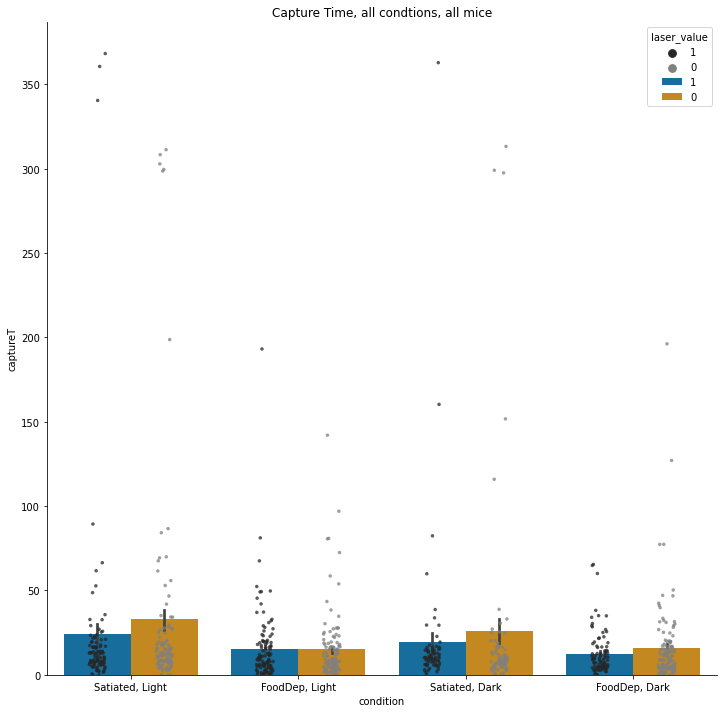

In [55]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df, color='gray', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
# plt.ylim(0,100)
# plt.yticks(np.arange(0,100,10))
sns.despine()

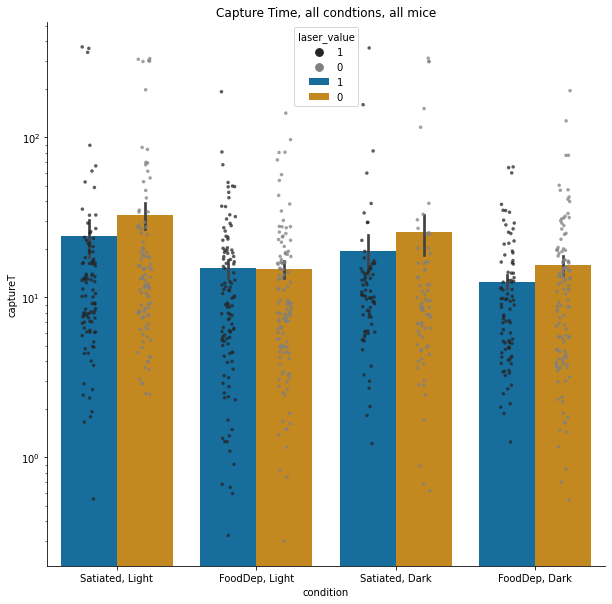

In [56]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df, color='gray', size=3.5, alpha=0.75, hue_order=hue_order)
ax.set_yscale('log')
plt.title('Capture Time, all condtions, all mice')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
# plt.ylim(0,50)
sns.despine()

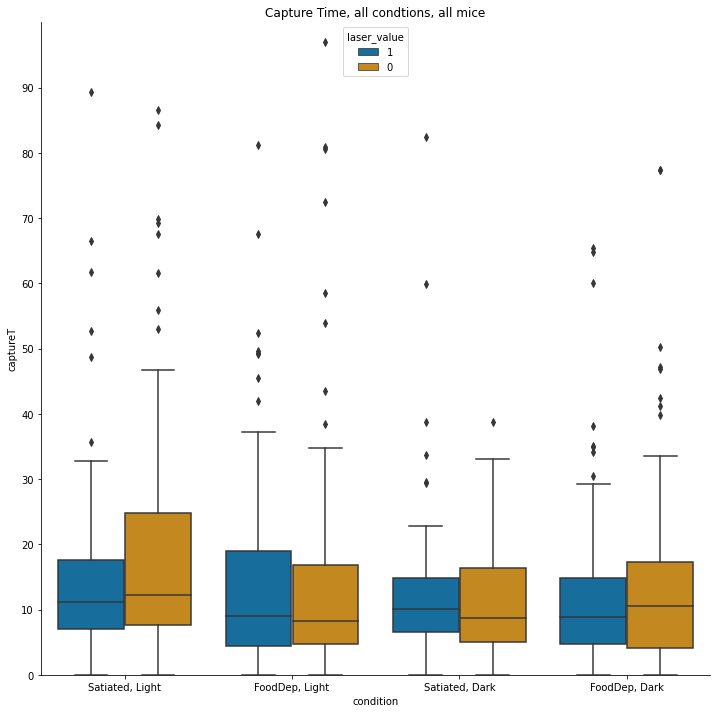

In [57]:
plt.figure(figsize=(12,12))
ax=sns.boxplot(data=df, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice')
plt.ylim(0,100)
plt.yticks(np.arange(0,100,10))
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
# ax.set_yscale('log')
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df, color='gray', size=3.5)
sns.despine()

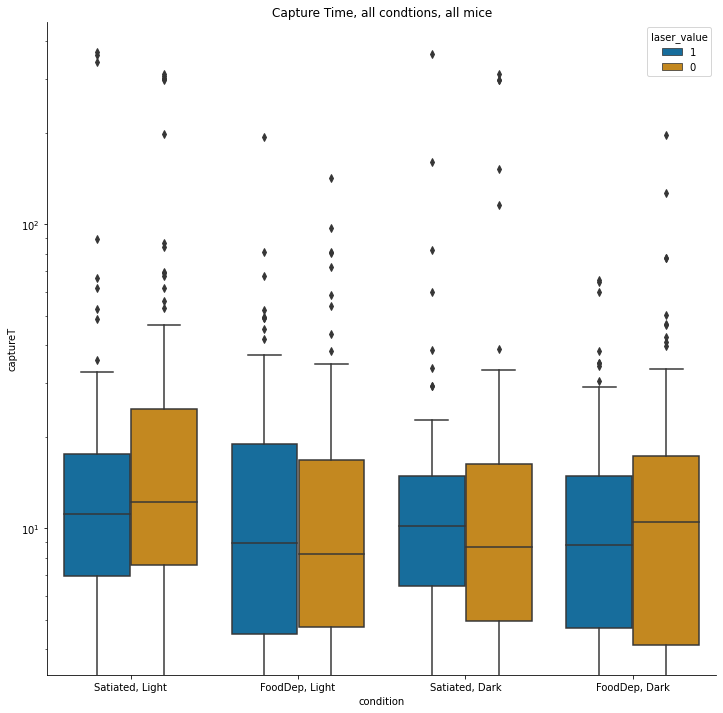

In [58]:
plt.figure(figsize=(12,12))
ax=sns.boxplot(data=df, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order)
ax.set_yscale('log')
plt.title('Capture Time, all condtions, all mice')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df, color='gray', size=3.5)
sns.despine()

#### Plot mean capture times for new mice

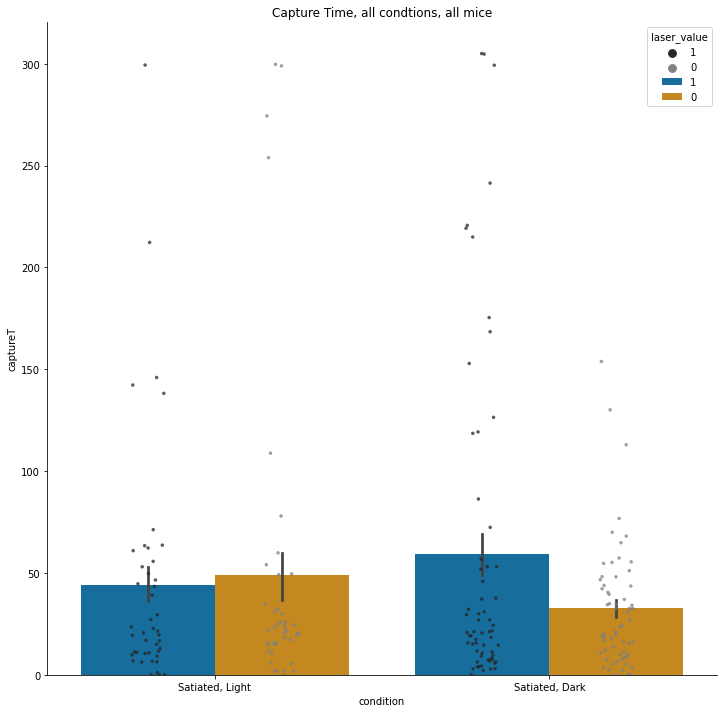

In [106]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df_laser, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df_laser, color='gray', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
# plt.ylim(0,100)
# plt.yticks(np.arange(0,100,10))
sns.despine()

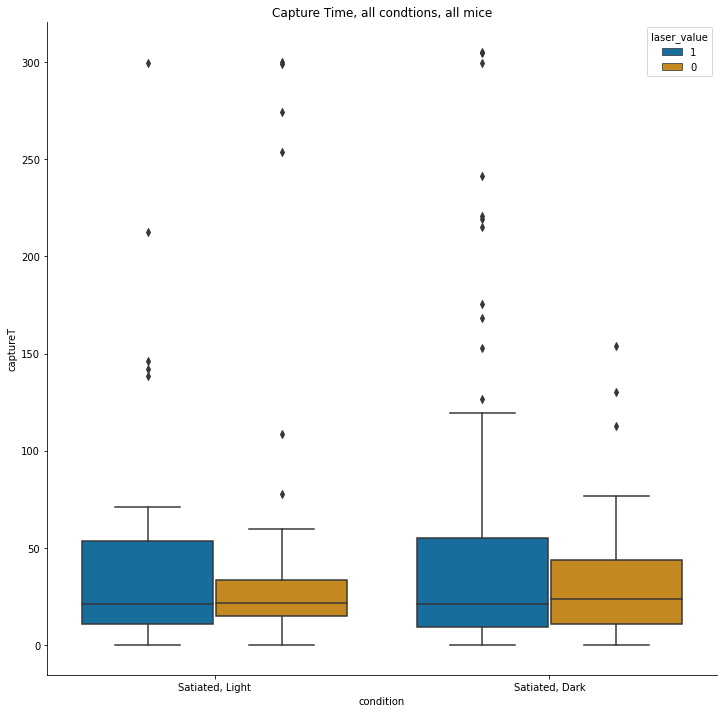

In [107]:
plt.figure(figsize=(12,12))
ax=sns.boxplot(data=df_laser, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df_laser, color='gray', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
# plt.ylim(0,100)
# plt.yticks(np.arange(0,100,10))
sns.despine()

<a id= 'Capture-Times-120s' ></a>
#### Plot mean capture times for dataset that has capture times longer than 120s removed (or should be, don't entirely trust this dataframe/ h5 file right now, need to dig into how it was generated).
###### return to [Table of Contents](#Table-of-Contents)

In [59]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df_120s, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df_120s, color='gray', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice, 120 sec')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
# plt.ylim(0,100)
# plt.yticks(np.arange(0,100,10))
sns.despine()

NameError: name 'df_120s' is not defined

<Figure size 864x864 with 0 Axes>

<a id= 'Approach-Latency-NoNan' ></a>
#### Plot mean time to approach for all mice, all data, all conditions
###### return to [Table of Contents](#Table-of-Contents)

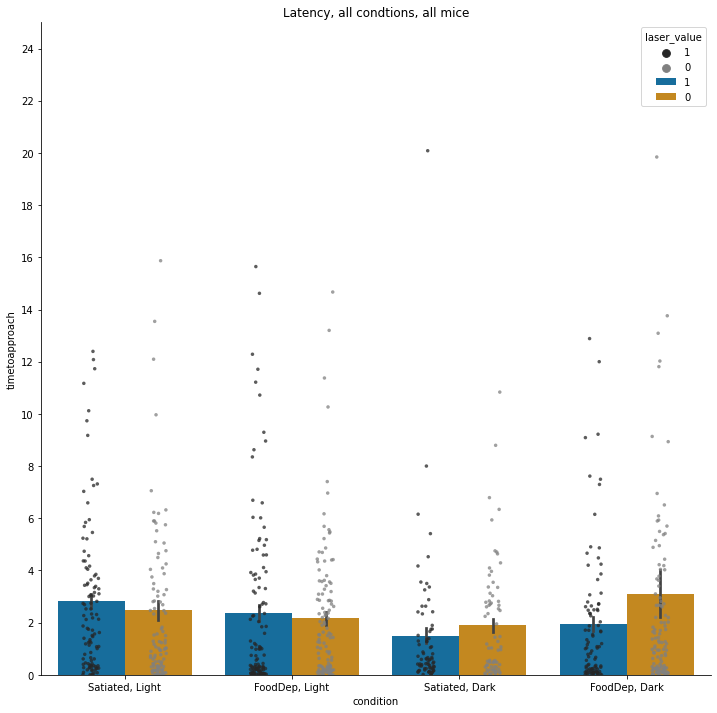

In [60]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df, x='condition', y='timetoapproach', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='timetoapproach', hue='laser_value',dodge=True, data=df, color='gray', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Latency, all condtions, all mice')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
plt.ylim(0,25)
plt.yticks(np.arange(0,25,2))
sns.despine()

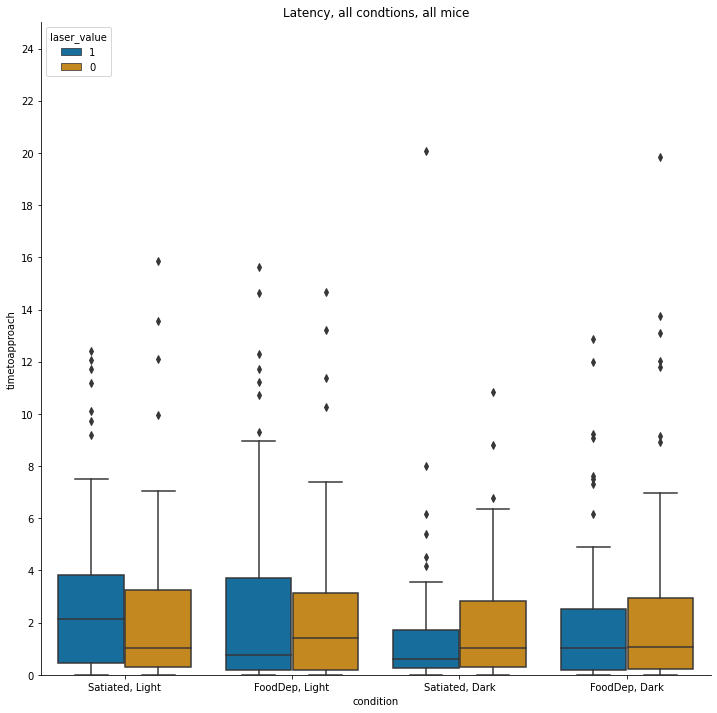

In [61]:
plt.figure(figsize=(12,12))
ax=sns.boxplot(data=df, x='condition', y='timetoapproach', hue='laser_value',  palette="colorblind", hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='timetoapproach', hue='laser_value',dodge=True, data=df, color='gray', size=3.5, alpha=0.75)
plt.title('Latency, all condtions, all mice')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
plt.ylim(0,25)
plt.yticks(np.arange(0,25,2))
sns.despine()

<a id= 'Approach-Latency-120s' ></a>
#### Mean time to approach for 120s dataset
###### return to [Table of Contents](#Table-of-Contents)

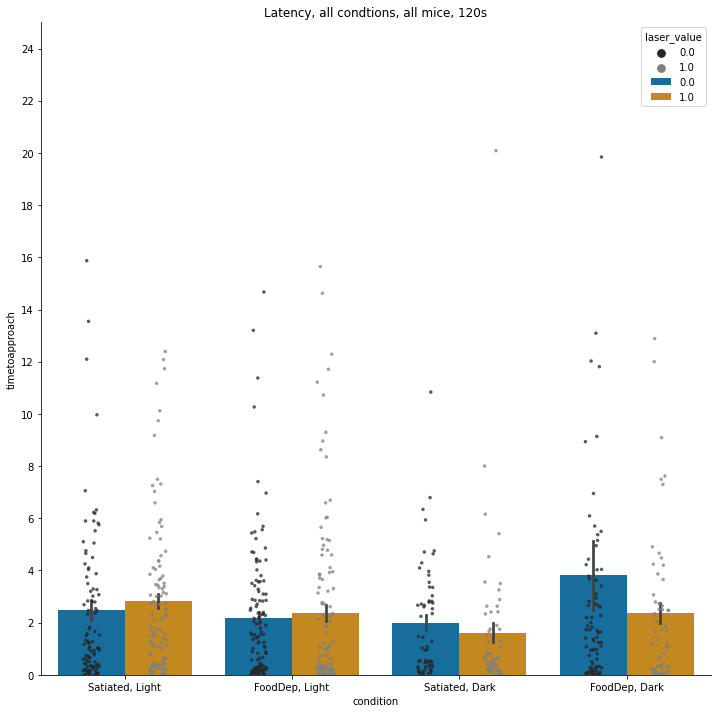

In [548]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df_120s, x='condition', y='timetoapproach', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='timetoapproach', hue='laser_value',dodge=True, data=df_120s, color='gray', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Latency, all condtions, all mice, 120s')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
plt.ylim(0,25)
plt.yticks(np.arange(0,25,2))
sns.despine()

<a id= 'Intercept-Latency-NoNan' ></a>
#### Mean latency to interception (time to first contact) for all data, all conditions all mice
###### return to [Table of Contents](#Table-of-Contents)

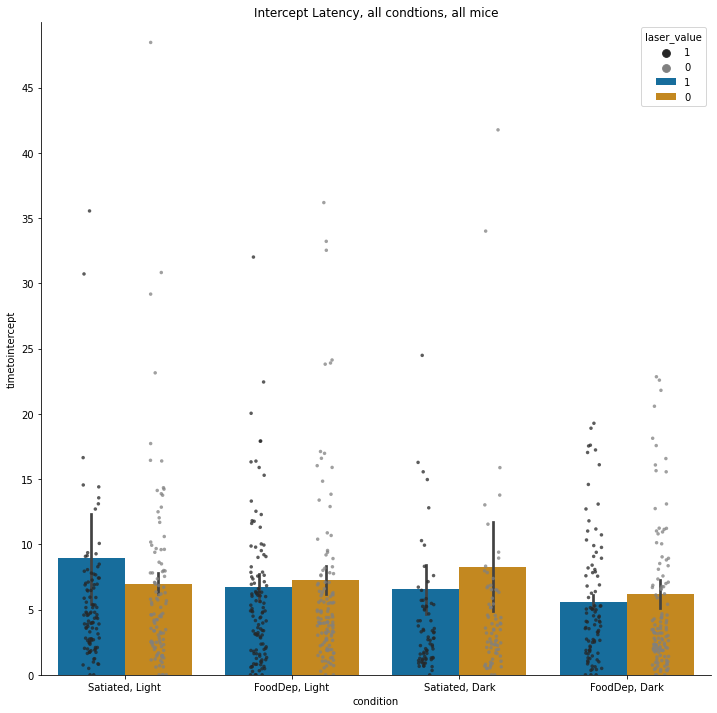

In [62]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df, x='condition', y='timetointercept', hue='laser_value', ci=68, palette="colorblind",hue_order=hue_order)
ax= sns.stripplot(x='condition', y='timetointercept', hue='laser_value',dodge=True, data=df, color='gray', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Intercept Latency, all condtions, all mice')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
plt.ylim(0,50)
plt.yticks(np.arange(0,50,5))
sns.despine()

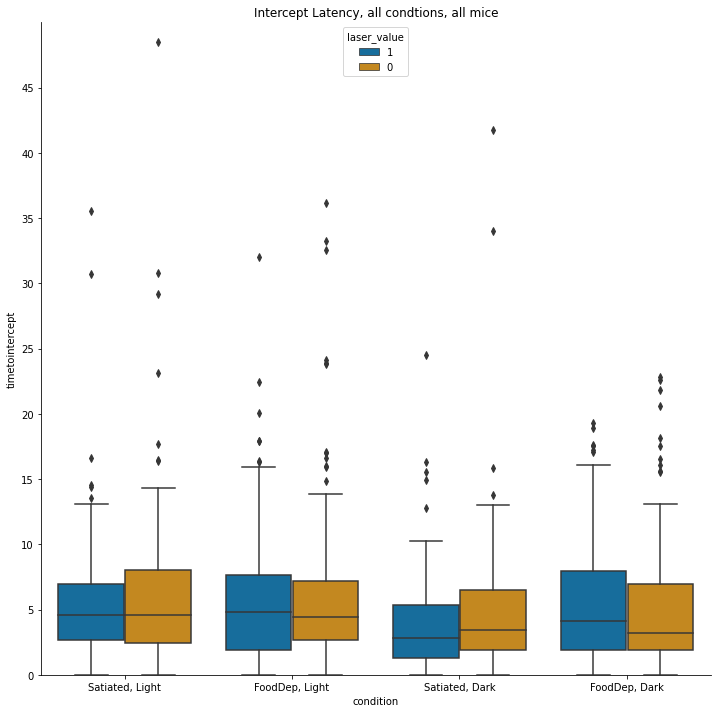

In [63]:
plt.figure(figsize=(12,12))
ax=sns.boxplot(data=df, x='condition', y='timetointercept', hue='laser_value', palette="colorblind", hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='timetointercept', hue='laser_value',dodge=True, data=df, color='gray', size=3.5, alpha=0.75)
plt.title('Intercept Latency, all condtions, all mice')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
plt.ylim(0,50)
plt.yticks(np.arange(0,50,5))
sns.despine()

#### Plot data for individual mice, first need to create a df for each of the mice to easily access the data

<a id= 'Mouse-0896' ></a>
#### mouse 0896
###### return to [Table of Contents](#Table-of-Contents)

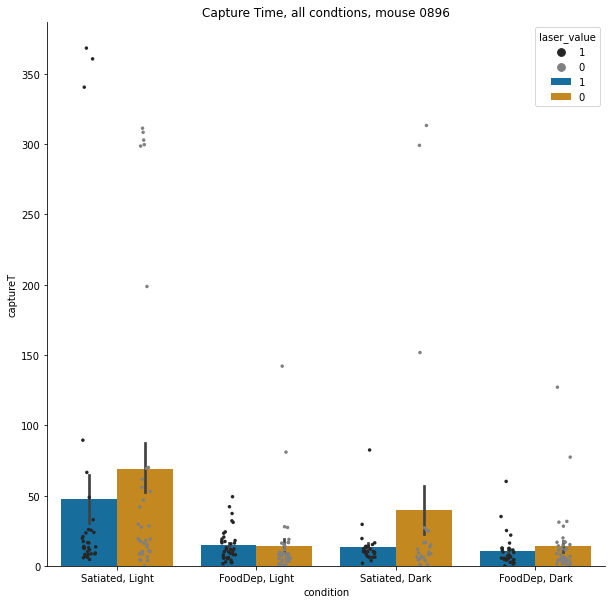

In [64]:
df['filename']=df['filename'].astype('str')
df0896=df[df['filename'].str.contains('0896')]
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0896, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind",hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0896, color='gray', size=3.5, hue_order=hue_order)
# # plt.ylim(0,50)
plt.title('Capture Time, all condtions, mouse 0896')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

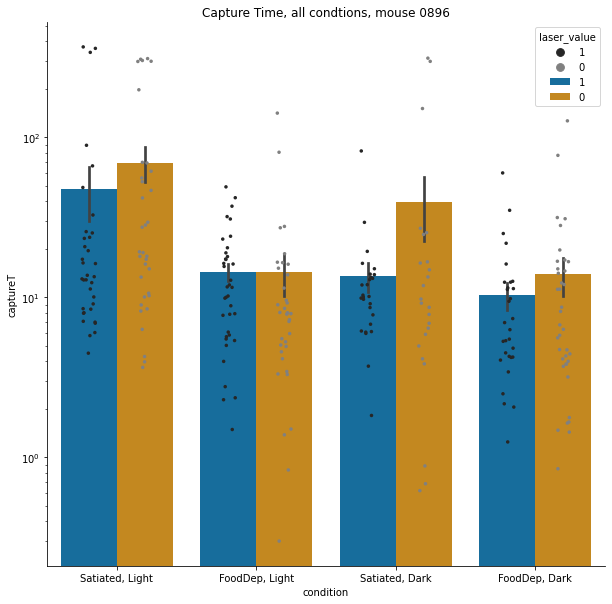

In [65]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0896, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0896, color='gray', size=3.5, hue_order=hue_order)
ax.set_yscale('log')
plt.title('Capture Time, all condtions, mouse 0896')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

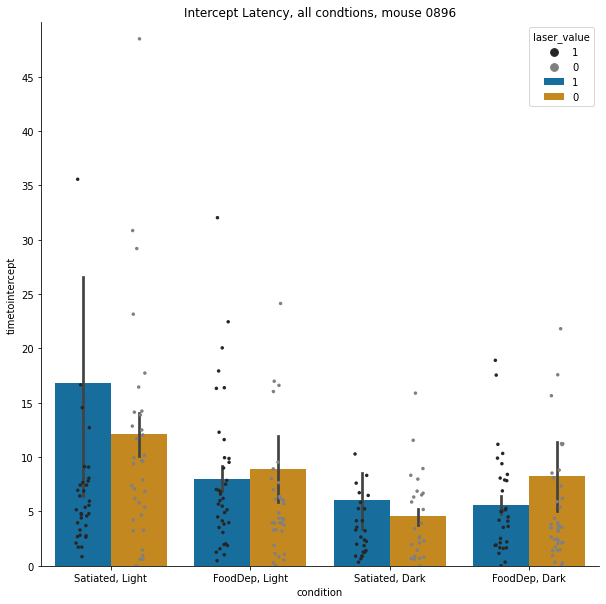

In [66]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0896, x='condition', y='timetointercept', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='timetointercept', hue='laser_value',dodge=True, data=df0896, color='gray', size=3.5, hue_order=hue_order)
plt.ylim(0,50)
plt.yticks(np.arange(0,50,5))
plt.title('Intercept Latency, all condtions, mouse 0896')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

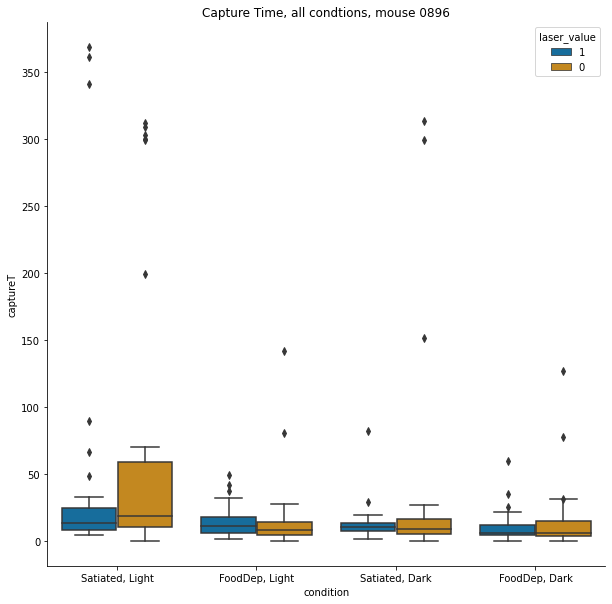

In [67]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(data=df0896, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0896, color='gray', size=3.5)
# ax.set_yscale('log')
plt.title('Capture Time, all condtions, mouse 0896')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

<a id= 'Mouse-0897' ></a>
#### mouse 0897
###### return to [Table of Contents](#Table-of-Contents)

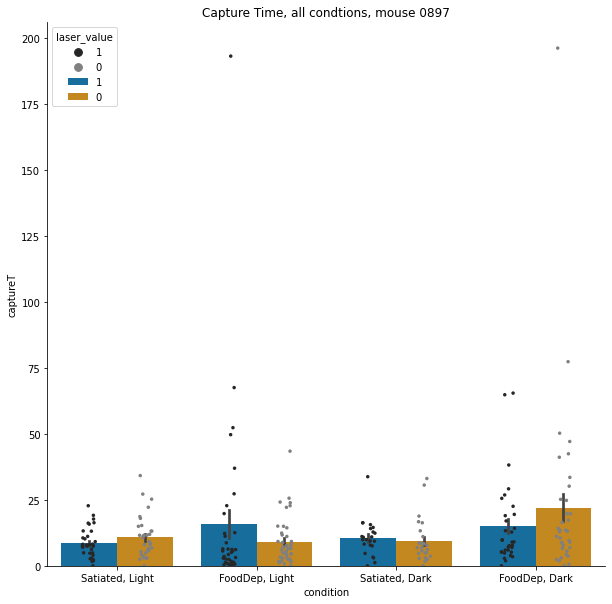

In [68]:
df0897=df[df['filename'].str.contains('0897')]
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0897, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0897, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, mouse 0897')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
# # plt.ylim(0,50)
sns.despine()

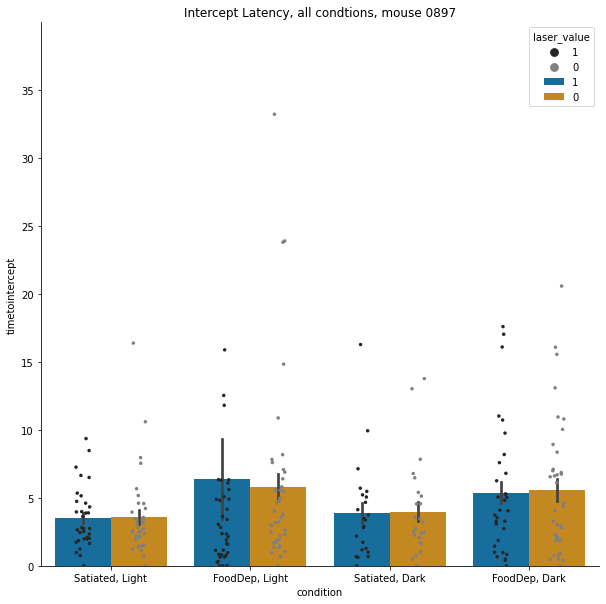

In [69]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0897, x='condition', y='timetointercept', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='timetointercept', hue='laser_value',dodge=True, data=df0897, color='gray', size=3.5, hue_order=hue_order)
plt.ylim(0,40)
plt.yticks(np.arange(0,40,5))
plt.title('Intercept Latency, all condtions, mouse 0897')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

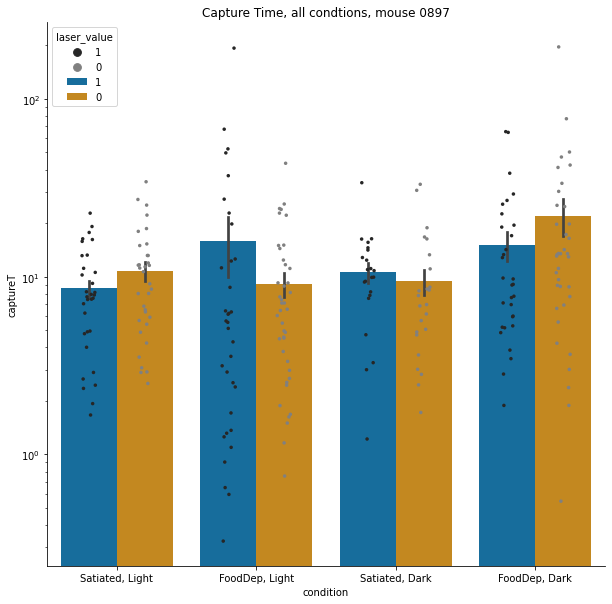

In [70]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0897, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0897, color='gray', size=3.5, hue_order=hue_order)
ax.set_yscale('log')
plt.title('Capture Time, all condtions, mouse 0897')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

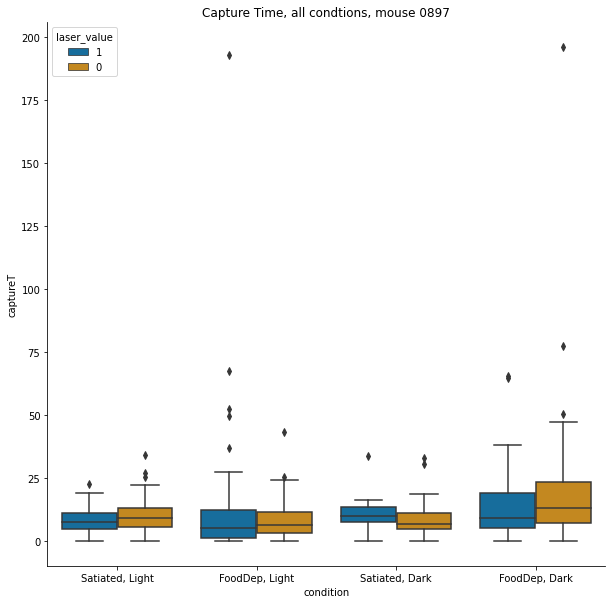

In [71]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(data=df0897, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0896, color='gray', size=3.5)
# ax.set_yscale('log')
plt.title('Capture Time, all condtions, mouse 0897')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

<a id= 'Mouse-0898' ></a>
#### mouse 0898
###### return to [Table of Contents](#Table-of-Contents)

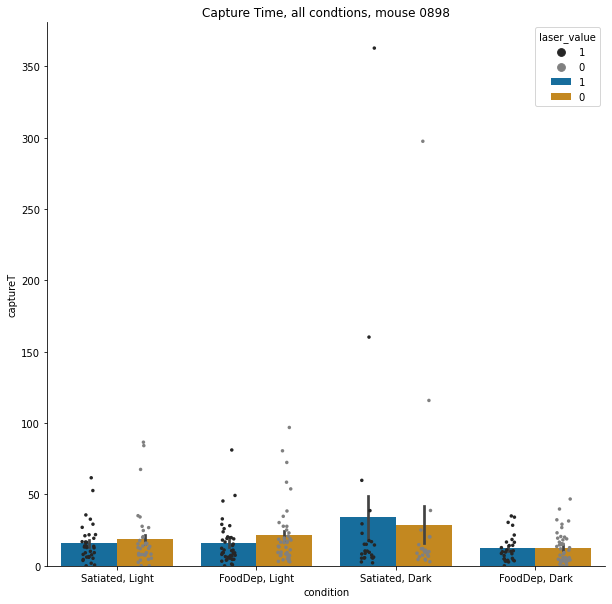

In [72]:
df0898=df[df['filename'].str.contains('0898')]
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0898, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0898, color='gray', size=3.5, hue_order=hue_order)
# # plt.ylim(0,50)
plt.title('Capture Time, all condtions, mouse 0898')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

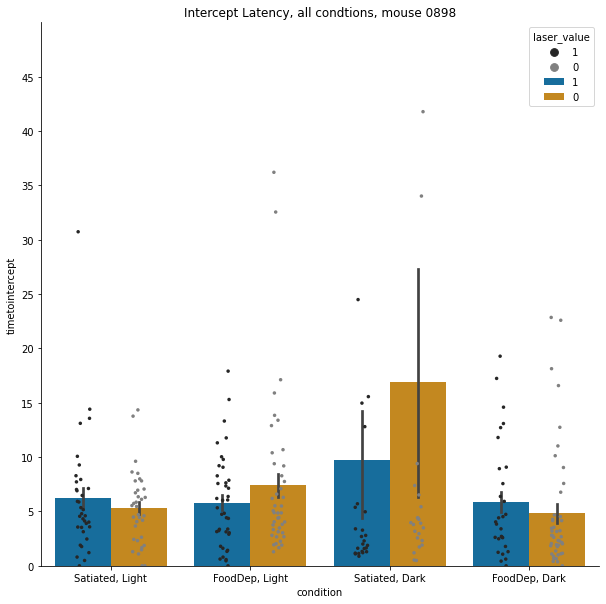

In [73]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0898, x='condition', y='timetointercept', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='timetointercept', hue='laser_value',dodge=True, data=df0898, color='gray', size=3.5, hue_order=hue_order)
plt.ylim(0,50)
plt.yticks(np.arange(0,50,5))
plt.title('Intercept Latency, all condtions, mouse 0898')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

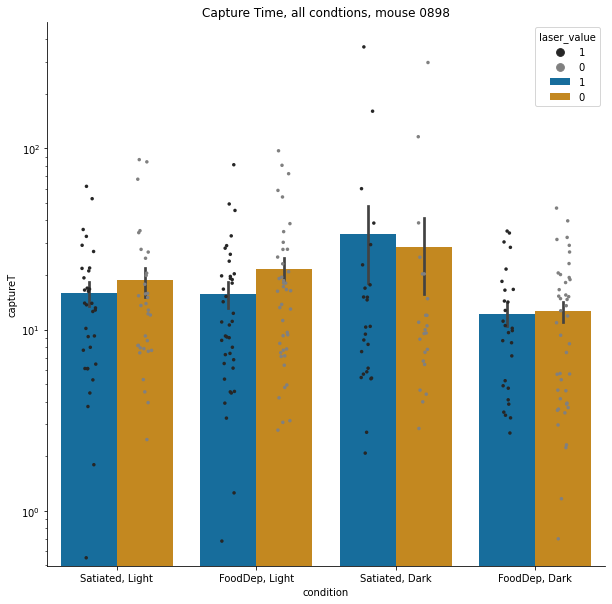

In [74]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0898, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0898, color='gray', size=3.5, hue_order=hue_order)
ax.set_yscale('log')
plt.title('Capture Time, all condtions, mouse 0898')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

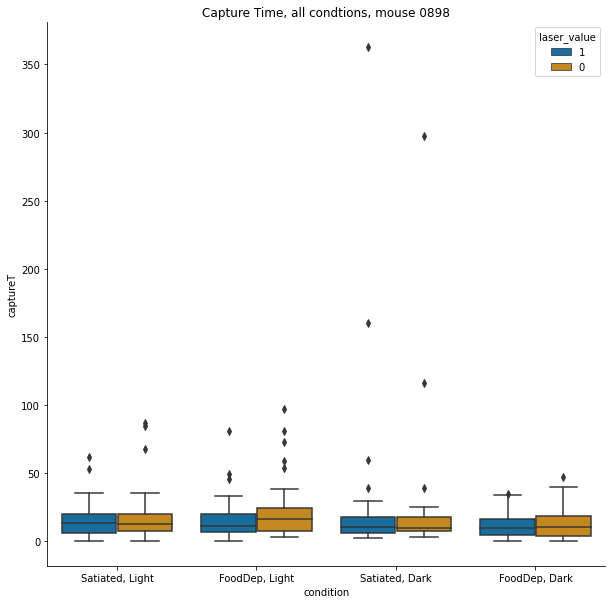

In [75]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(data=df0898, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0896, color='gray', size=3.5)
# ax.set_yscale('log')
plt.title('Capture Time, all condtions, mouse 0898')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

<a id= 'Session-ID' ></a>
#### Plotting various measures across the course of sessions within condition. This doesn't really tell us anything informative.
###### return to [Table of Contents](#Table-of-Contents)

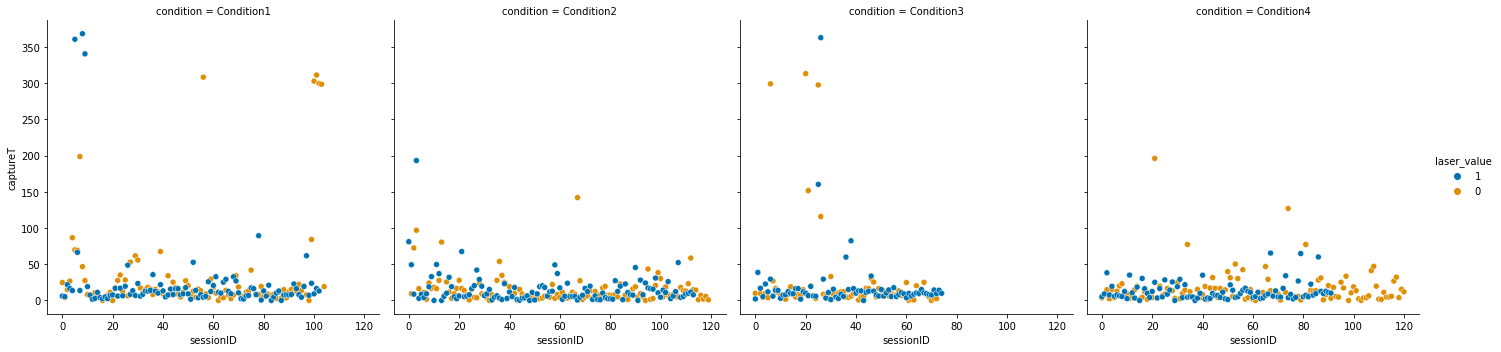

In [76]:
sns.relplot(x='sessionID', y='captureT', col='condition', hue='laser_value', data=copydf,palette="colorblind", hue_order=hue_order)
# plt.xlim(0,20)
# plt.ylim(0,100)

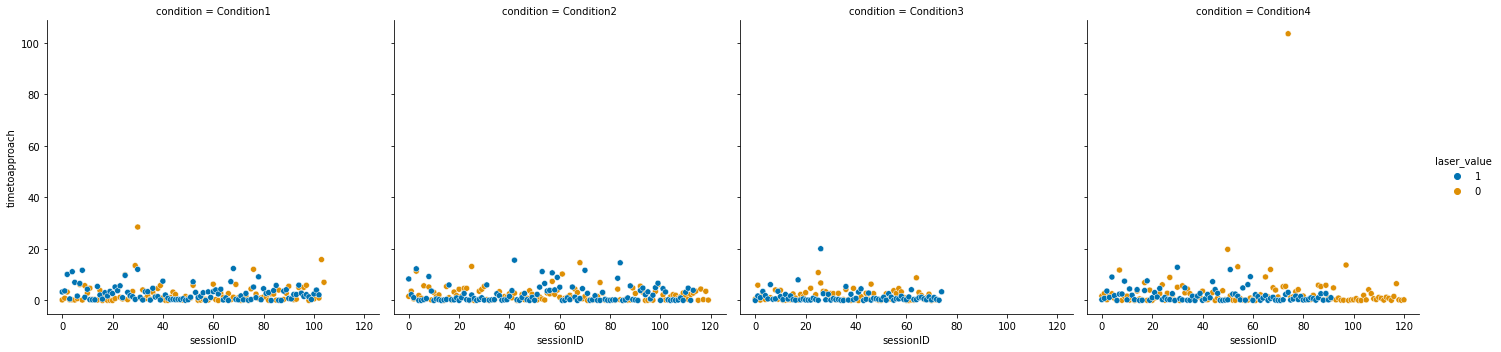

In [77]:
sns.relplot(x='sessionID', y='timetoapproach', col='condition', hue='laser_value', data=copydf,palette="colorblind", hue_order=hue_order)
# plt.ylim(0,25)
# plt.xlim(0,20)

(0.0, 50.0)

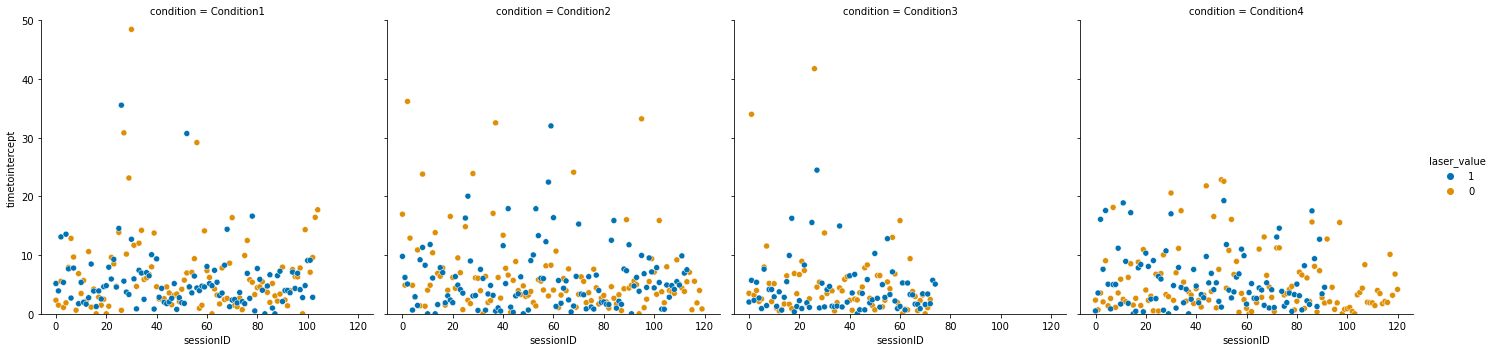

In [78]:
sns.relplot(x='sessionID', y='timetointercept', col='condition', hue='laser_value', data=copydf,palette="colorblind", hue_order=hue_order)
plt.ylim(0,50)

(0.0, 100.0)

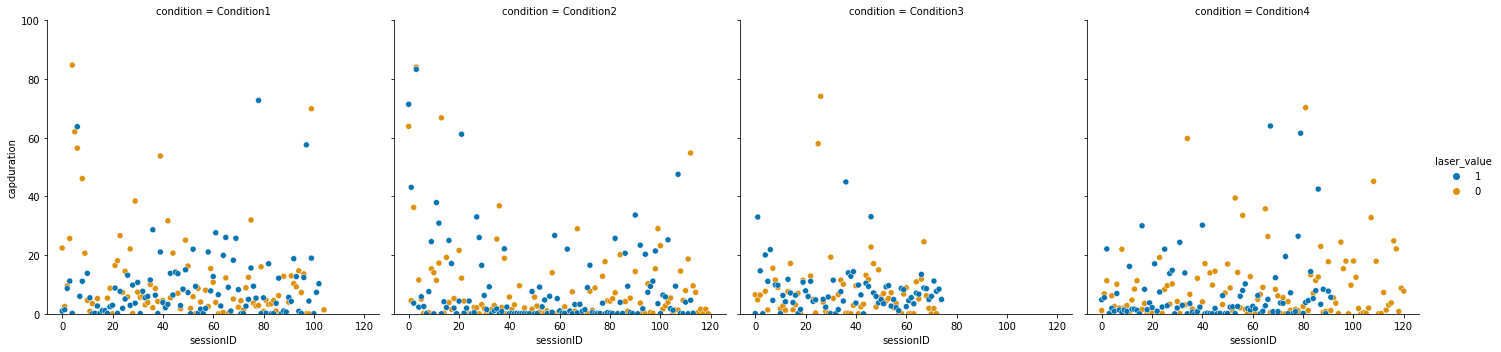

In [79]:
sns.relplot(x='sessionID', y='capduration', col='condition', hue='laser_value', data=copydf,palette="colorblind", hue_order=hue_order)
plt.ylim(0,100)
# plt.xlim(0,40)

<a id= 'Speed' ></a>
#### Plot average mouse speed across condtions and trials. Need to separate out the speed into pursuit/ approach speed to get a better idea of if the laser has any effect.
###### return to [Table of Contents](#Table-of-Contents)

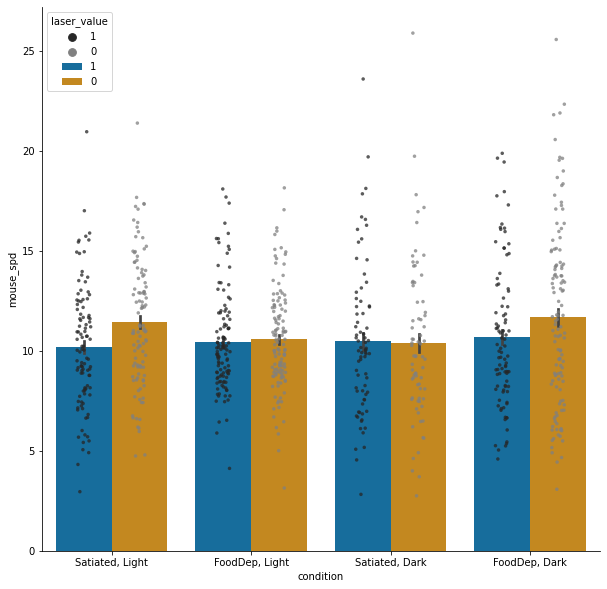

In [80]:
plt.figure(figsize=(10,10))
sns.barplot(data=meanspeed,x='condition', y='mouse_spd', hue='laser_value', ci=68,palette="colorblind", hue_order=hue_order)
sns.stripplot(x='condition', y='mouse_spd', hue='laser_value',dodge=True, data=meanspeed, color='gray', size=3.5, alpha=0.75, hue_order=hue_order)
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

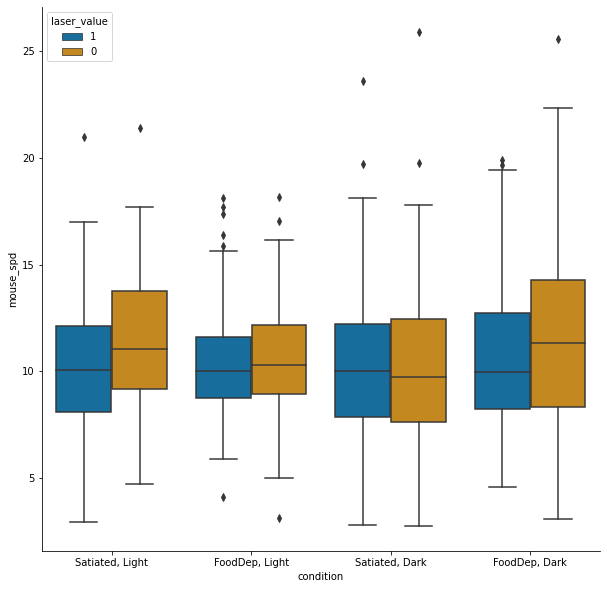

In [81]:
plt.figure(figsize=(10,10))
sns.boxplot(data=meanspeed,x='condition', y='mouse_spd', hue='laser_value',palette="colorblind", hue_order=hue_order)
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()

#### mouse 0891

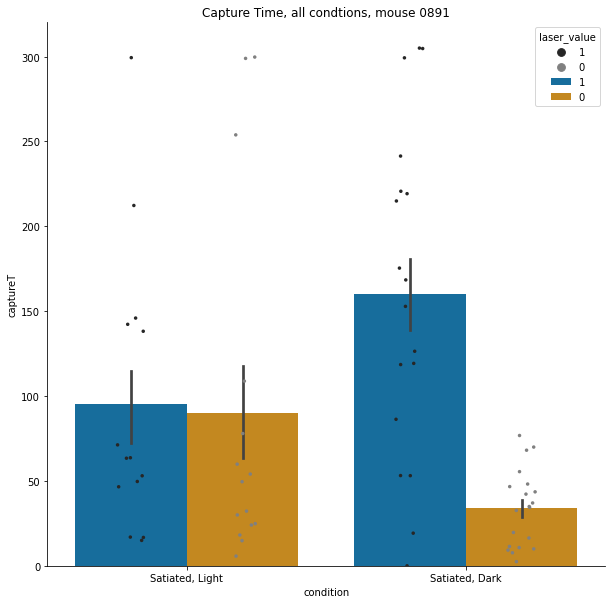

In [111]:
df0891=df_laser[df_laser['filename'].str.contains('0891')]
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0891, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0891, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, mouse 0891')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

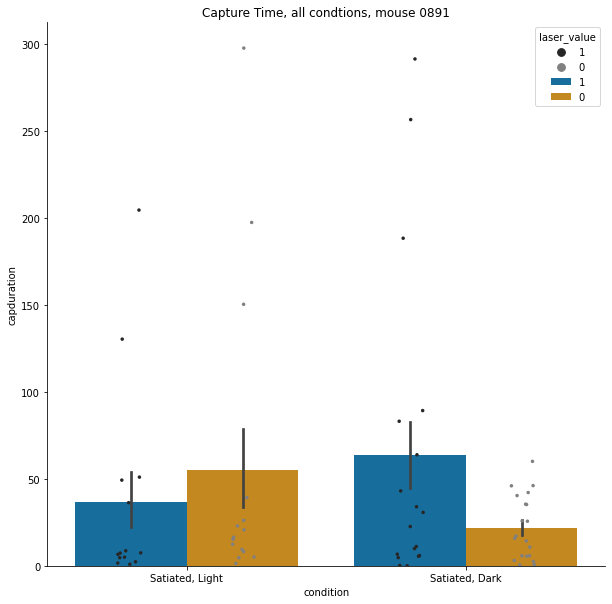

In [113]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0891, x='condition', y='capduration', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df0891, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, mouse 0891')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

#### mouse 0893

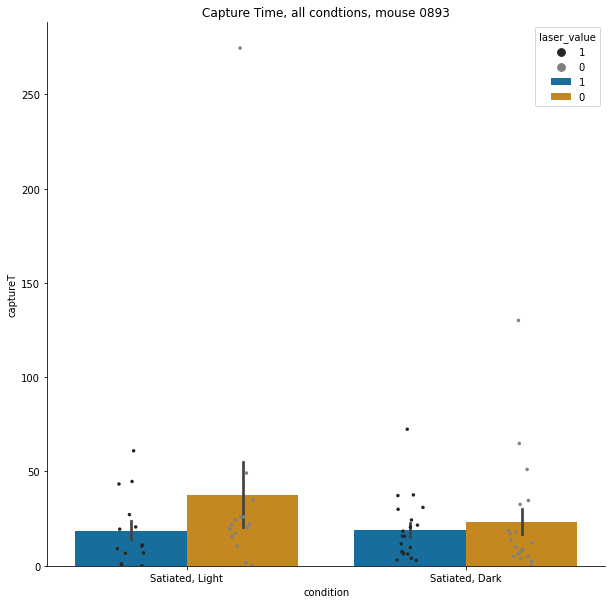

In [116]:
df0893=df_laser[df_laser['filename'].str.contains('0893')]
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0893, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0893, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, mouse 0893')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

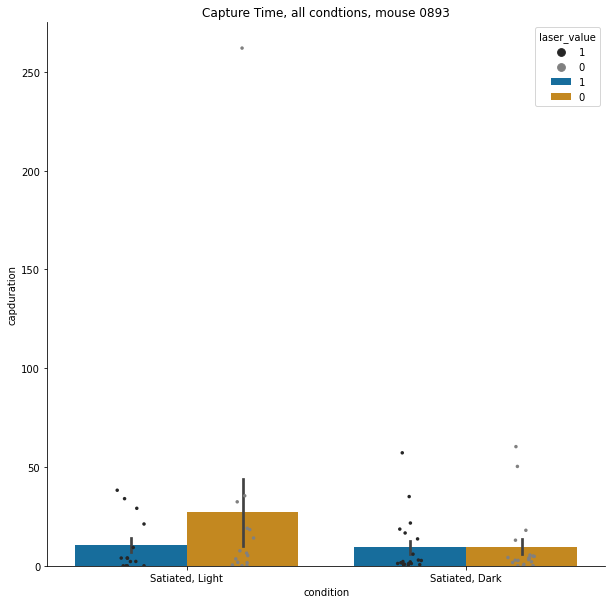

In [117]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0893, x='condition', y='capduration', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df0893, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, mouse 0893')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

#### mouse 0895

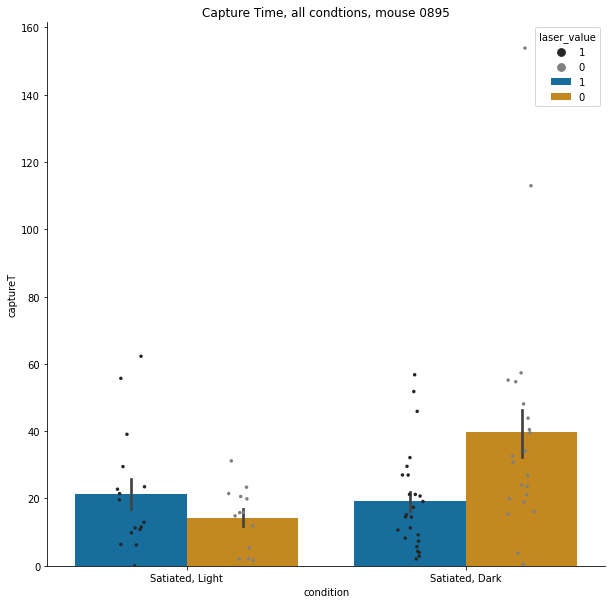

In [118]:
df0895=df_laser[df_laser['filename'].str.contains('0895')]
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0895, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df0895, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, mouse 0895')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

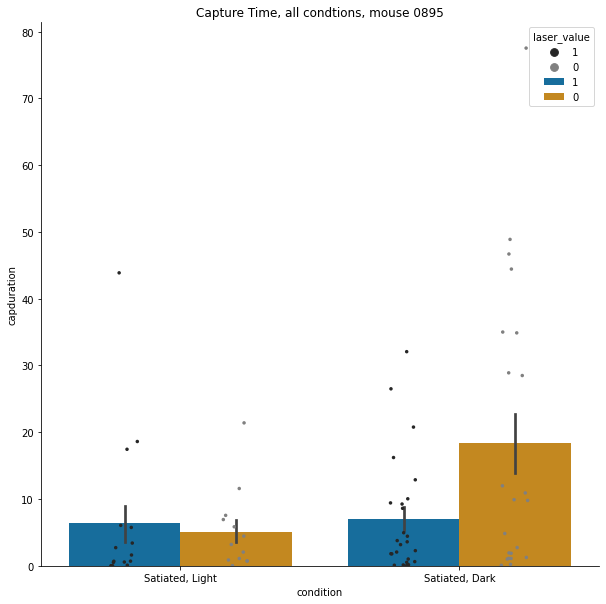

In [119]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df0895, x='condition', y='capduration', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df0895, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, mouse 0895')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

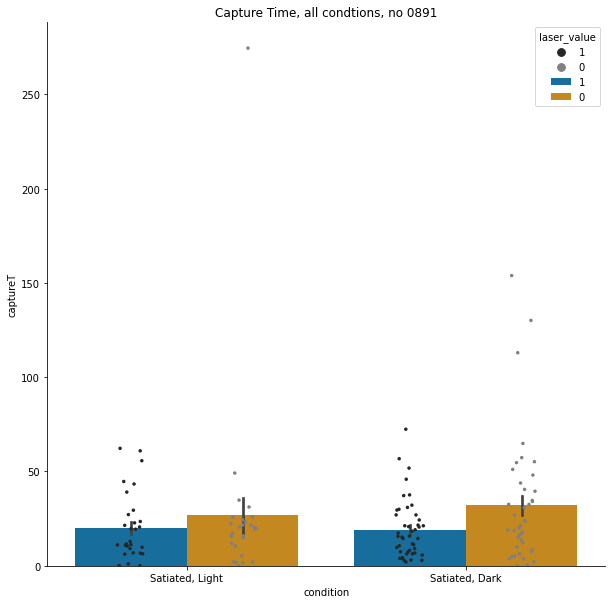

In [125]:
df_male=df_laser[df_laser['filename'].str.contains('0895|0893')]
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df_male, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df_male, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, no 0891')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
sns.despine()

<a id= 'Capture-Durations-NoNan' ></a>
#### Comparison plots between capture time and capture duration for all data, no times thrown out.
###### return to [Table of Contents](#Table-of-Contents)

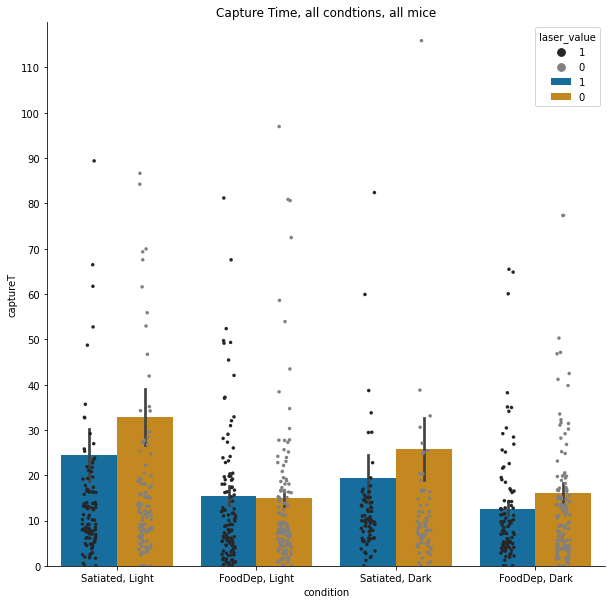

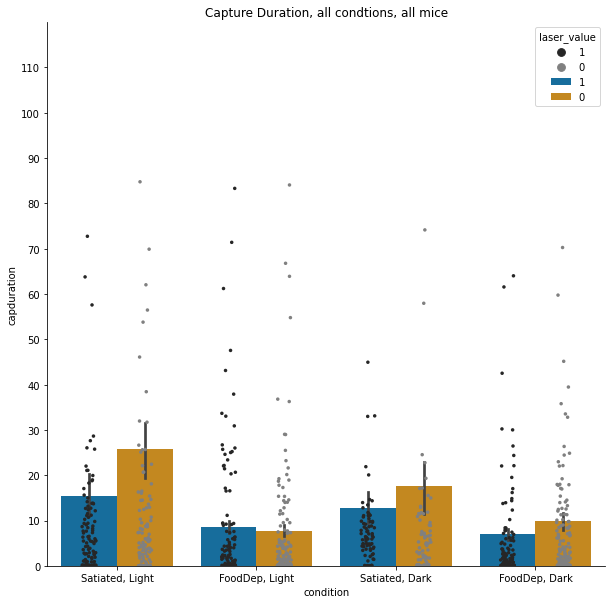

In [82]:
fig1= plt.figure(figsize=(10,10))
sns.barplot(data=df, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order, ci=68)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice')
plt.ylim(0,120)
plt.yticks(np.arange(0,120,10))
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])

sns.despine()
                  
fig2=plt.figure(figsize=(10,10))
sns.barplot(data=df, x='condition', y='capduration', hue='laser_value', palette="colorblind", hue_order=hue_order, ci=68)
sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Duration, all condtions, all mice')
plt.ylim(0,120)
plt.yticks(np.arange(0,120,10))
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])

sns.despine()

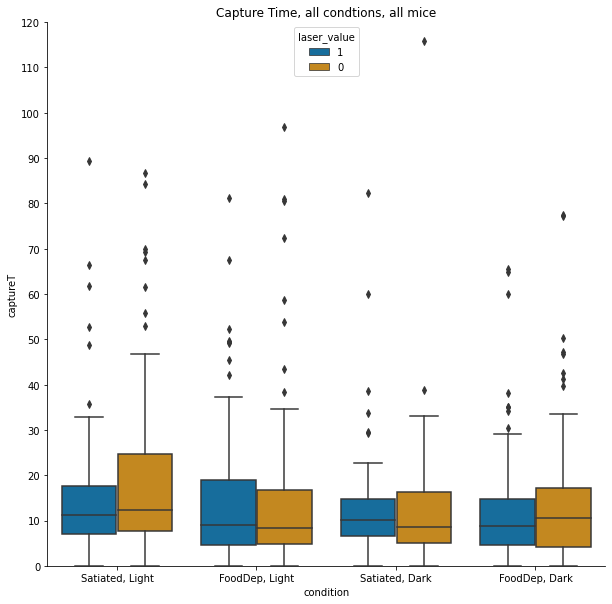

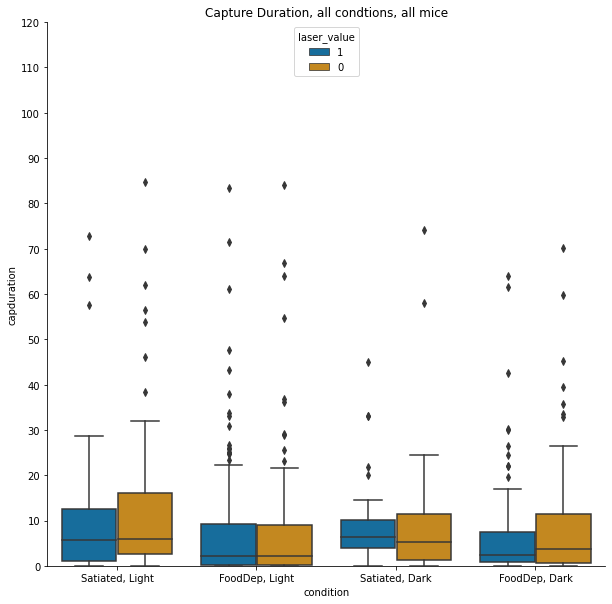

In [148]:
fig1= plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])

sns.despine()
fig2=plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='condition', y='capduration', hue='laser_value', palette="colorblind", hue_order=hue_order)
plt.title('Capture Duration, all condtions, all mice')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
# ax.set_yscale('log')
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df, color='gray', size=3.5)
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_box.pdf')

<a id= 'Capture-Times-300s' ></a>
<a id= 'Capture-Durations-300s' ></a>
#### Comparison plots between capture time and capture duration for all data, 300s.
###### return to [Table of Contents](#Table-of-Contents)

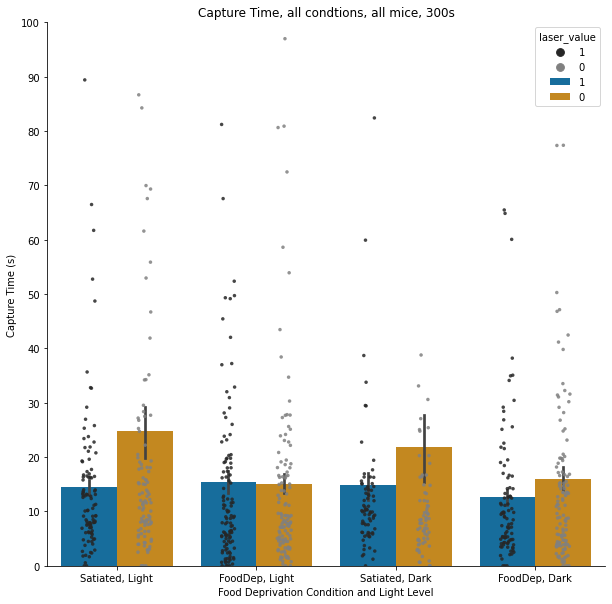

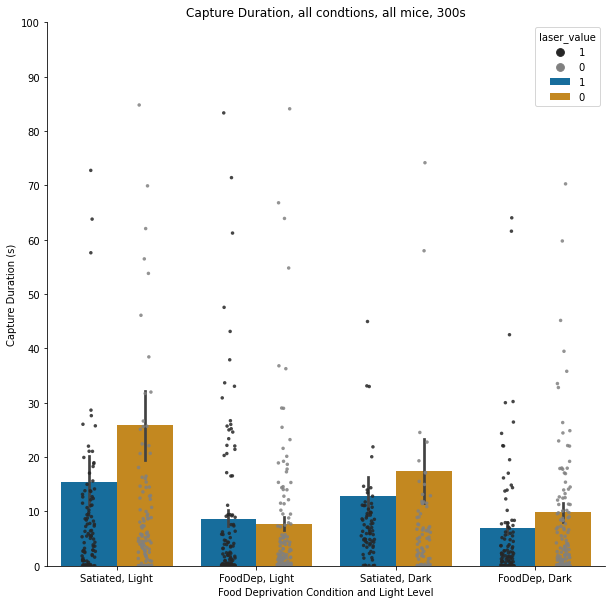

In [115]:
fig1= plt.figure(figsize=(10,10))
ax=sns.barplot(data=nandf, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=nandf, color='gray', size=3.5, alpha=0.85, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice, 300s')
plt.ylim(0,100)
plt.yticks(np.arange(0,110,10))
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
plt.xlabel('Food Deprivation Condition and Light Level')
plt.ylabel('Capture Time (s)')
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_bar_300s_cutoff.pdf')

fig2=plt.figure(figsize=(10,10))
ax=sns.barplot(data=nandf, x='condition', y='capduration', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=nandf, color='gray', size=3.5, alpha=0.85, hue_order=hue_order)
plt.title('Capture Duration, all condtions, all mice, 300s')
plt.ylim(0,100)
plt.yticks(np.arange(0,110,10))
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
plt.xlabel('Food Deprivation Condition and Light Level')
plt.ylabel('Capture Duration (s)')
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_bar_300s_cutoff.pdf')

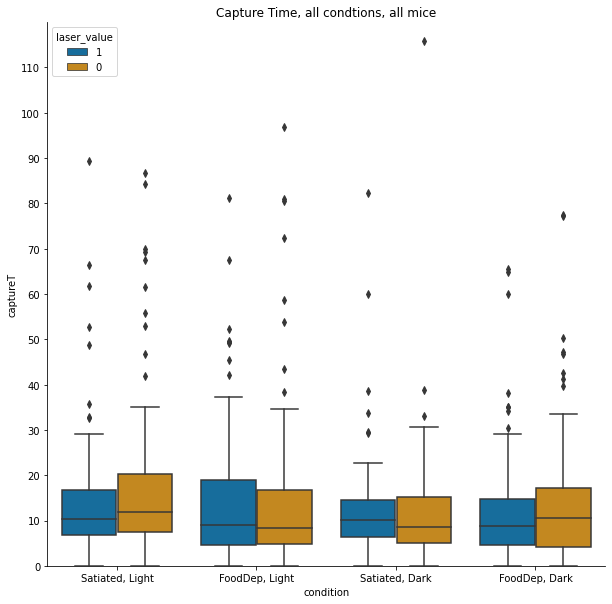

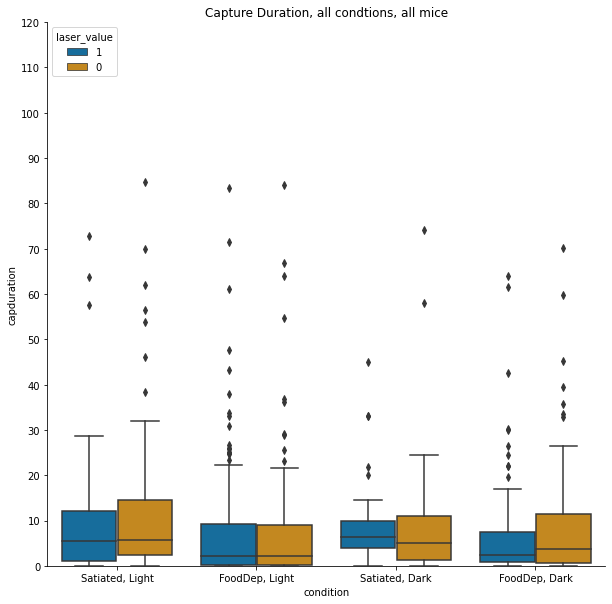

In [149]:
fig1= plt.figure(figsize=(10,10))
sns.boxplot(data=nandf, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice')
plt.ylim(0,120)
plt.yticks(np.arange(0,120,10))
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])

sns.despine()
fig2=plt.figure(figsize=(10,10))
sns.boxplot(data=nandf, x='condition', y='capduration', hue='laser_value', palette="colorblind", hue_order=hue_order)
plt.title('Capture Duration, all condtions, all mice')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
# ax.set_yscale('log')
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df, color='gray', size=3.5)
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_box_300s.pdf')

#### Comparison plots for capture time and duration for new mice

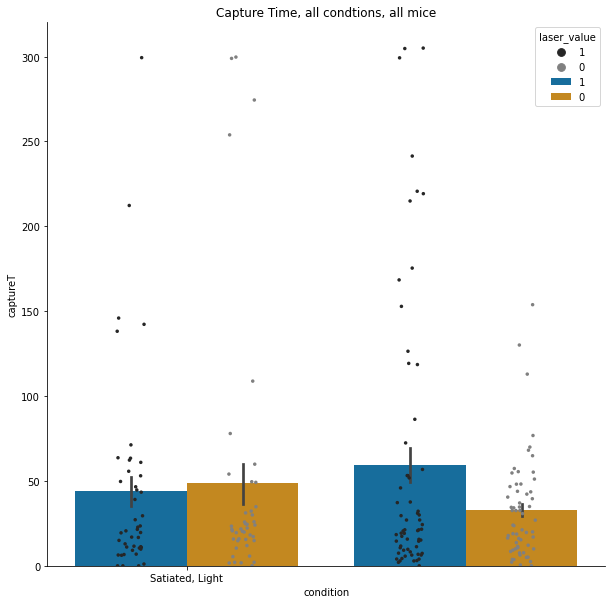

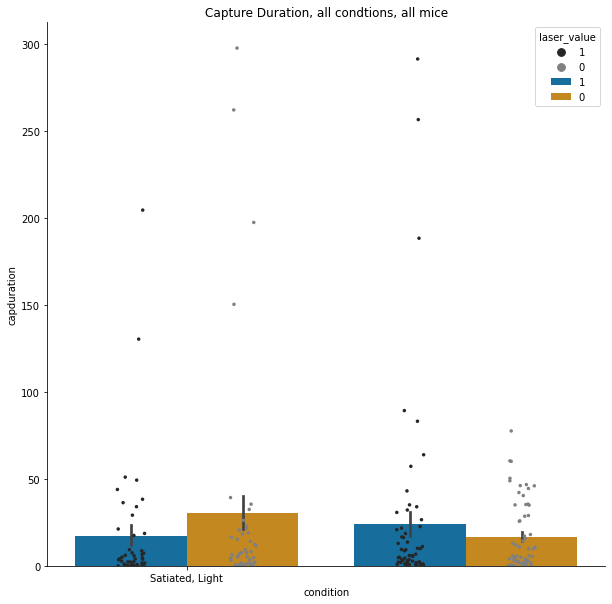

In [108]:
fig1= plt.figure(figsize=(10,10))
sns.barplot(data=df_laser, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order, ci=68)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df_laser, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice')
# plt.ylim(0,120)
# plt.yticks(np.arange(0,120,10))
plt.xticks([0],['Satiated, Light'])

sns.despine()
                  
fig2=plt.figure(figsize=(10,10))
sns.barplot(data=df_laser, x='condition', y='capduration', hue='laser_value', palette="colorblind", hue_order=hue_order, ci=68)
sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df_laser, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Duration, all condtions, all mice')
# plt.ylim(0,120)
# plt.yticks(np.arange(0,120,10))
plt.xticks([0],['Satiated, Light'])

sns.despine()

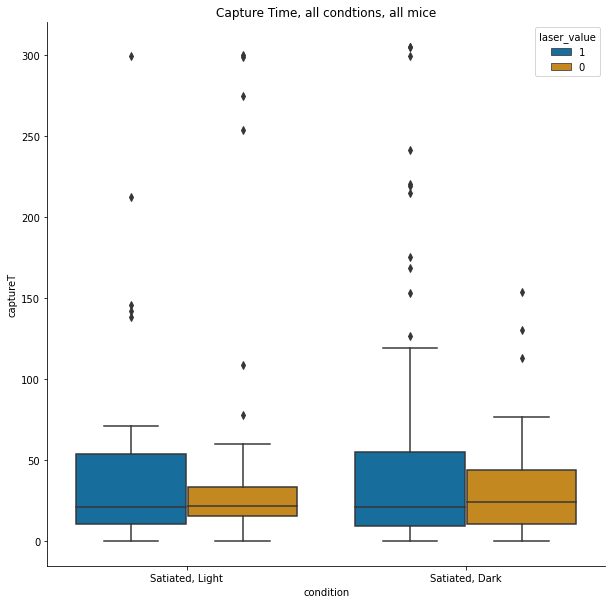

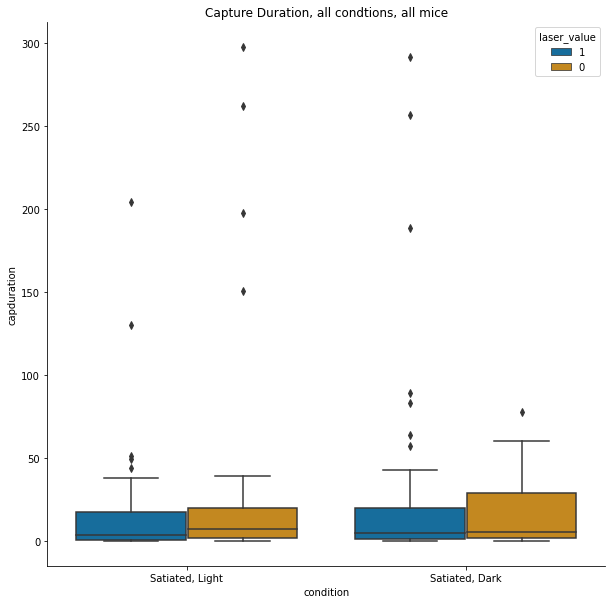

In [120]:
fig1= plt.figure(figsize=(10,10))
sns.boxplot(data=df_laser, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df_laser, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice')
# plt.ylim(0,120)
# plt.yticks(np.arange(0,120,10))
plt.xticks([0,1],['Satiated, Light','Satiated, Dark'])

sns.despine()
                  
fig2=plt.figure(figsize=(10,10))
sns.boxplot(data=df_laser, x='condition', y='capduration', hue='laser_value', palette="colorblind", hue_order=hue_order)
# sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df_laser, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Duration, all condtions, all mice')
# plt.ylim(0,120)
# plt.yticks(np.arange(0,120,10))
plt.xticks([0,1],['Satiated, Light','Satiated, Dark'])

sns.despine()

#### Comparison plots for new male mice

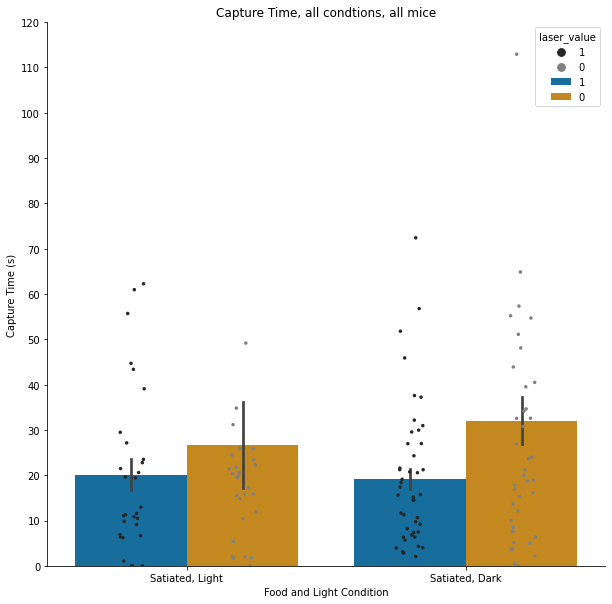

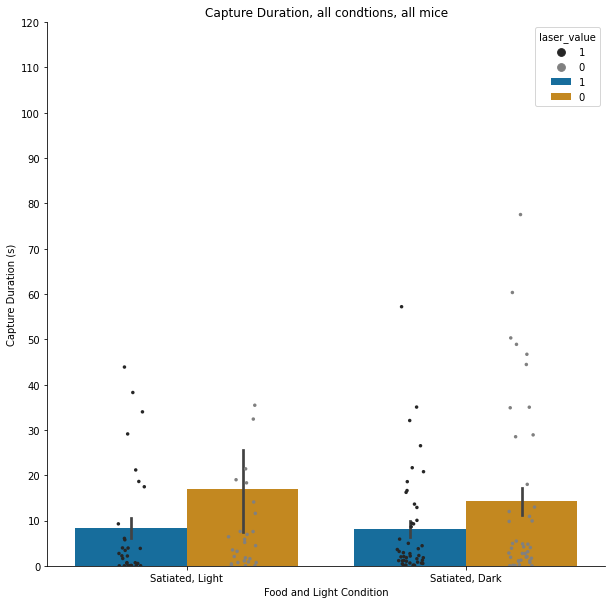

In [143]:
fig1= plt.figure(figsize=(10,10))
sns.barplot(data=df_male, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order, ci=68)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df_male, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.ylabel('Capture Time (s)')
plt.xlabel('Food and Light Condition')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_bar_males.pdf')
sns.despine()
                  
fig2=plt.figure(figsize=(10,10))
sns.barplot(data=df_male, x='condition', y='capduration', hue='laser_value', palette="colorblind", hue_order=hue_order, ci=68)
sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df_male, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Duration, all condtions, all mice')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.ylabel('Capture Duration (s)')
plt.xlabel('Food and Light Condition')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_bar_males.pdf')

sns.despine()

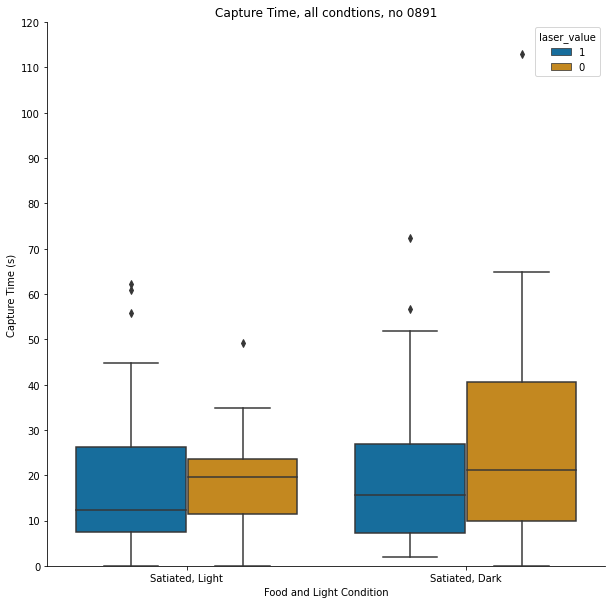

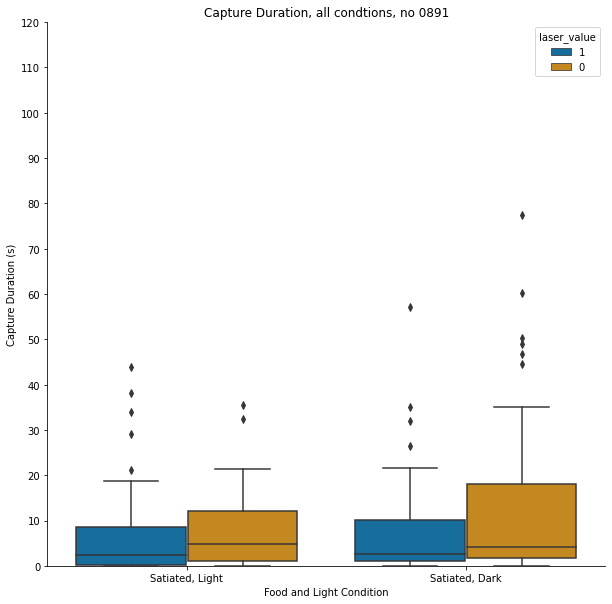

In [144]:
fig1= plt.figure(figsize=(10,10))
sns.boxplot(data=df_male, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df_male, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Time, all condtions, no 0891')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.ylabel('Capture Time (s)')
plt.xlabel('Food and Light Condition')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_box_males.pdf')

sns.despine()
                  
fig2=plt.figure(figsize=(10,10))
sns.boxplot(data=df_male, x='condition', y='capduration', hue='laser_value', palette="colorblind", hue_order=hue_order)
# sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df_male, color='gray', size=3.5, hue_order=hue_order)
plt.title('Capture Duration, all condtions, no 0891')
plt.ylim(0,120)
plt.yticks(np.arange(0,130,10))
plt.ylabel('Capture Duration (s)')
plt.xlabel('Food and Light Condition')
plt.xticks([0,1],['Satiated, Light', 'Satiated, Dark'])
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_box_males.pdf')

sns.despine()

<a id= 'Capture-Times-120s' ></a>
#### Comparison plots between capture time and capture duration for all data, 120s.
###### return to [Table of Contents](#Table-of-Contents)

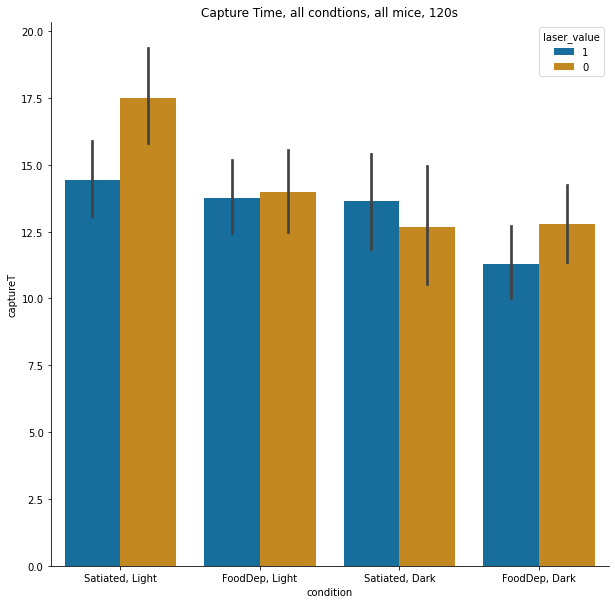

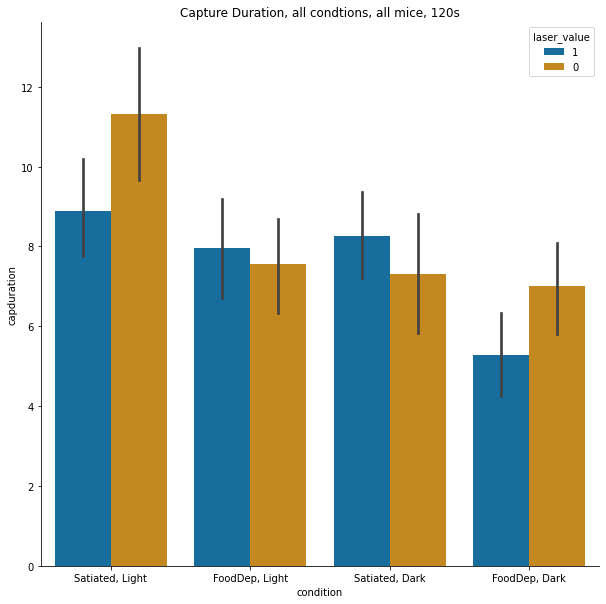

In [619]:
fig1= plt.figure(figsize=(10,10))
ax=sns.barplot(data=nandf_120, x='condition', y='captureT', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=nandf_120, color='gray', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice, 120s')
# plt.ylim(0,40)
# plt.yticks(np.arange(0,40,5))
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
sns.despine()
fig2=plt.figure(figsize=(10,10))
ax=sns.barplot(data=nandf_120, x='condition', y='capduration', hue='laser_value', ci=68, palette="colorblind", hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=nandf_120, color='gray', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, all mice, 120s')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
# plt.ylim(0,40)
# plt.yticks(np.arange(0,40,5))
# ax.set_yscale('log')
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df, color='gray', size=3.5)
sns.despine()

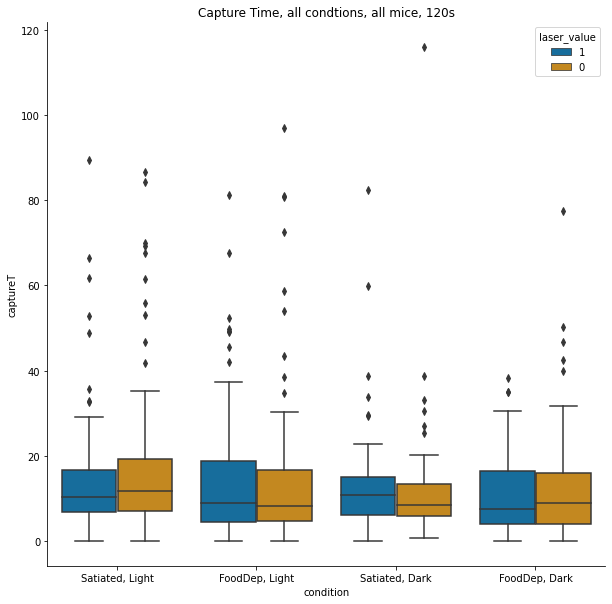

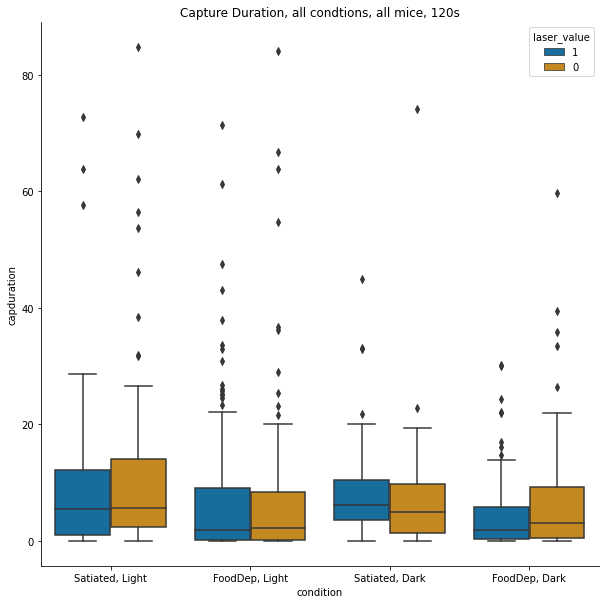

In [620]:
fig1= plt.figure(figsize=(10,10))
ax=sns.boxplot(data=nandf_120, x='condition', y='captureT', hue='laser_value', palette="colorblind", hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=nandf120, color='gray', size=3.5, alpha=0.75)
plt.title('Capture Time, all condtions, all mice, 120s')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
# plt.ylim(0,120)
# plt.yticks(np.arange(0,120,10))
sns.despine()
fig2=plt.figure(figsize=(10,10))
ax=sns.boxplot(data=nandf_120, x='condition', y='capduration', hue='laser_value', palette="colorblind", hue_order=hue_order)
# ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=nandf120, color='gray', size=3.5, alpha=0.75)
plt.title('Capture Duration, all condtions, all mice, 120s')
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
# plt.ylim(0,120)
# plt.yticks(np.arange(0,120,10))
# ax.set_yscale('log')
# ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df, color='gray', size=3.5)
sns.despine()

<a id= 'Distributions' ></a>
# Doing some stuff to try to plot distributions of capture time and duration instead of just means and medians to see if something is different between the laser conditions.
###### return to [Table of Contents](#Table-of-Contents)

<a id= 'Distributions-300s' ></a>
#### Emprircal cumulative distribtion function plots for capture times, times over 300s removed.
###### return to [Table of Contents](#Table-of-Contents)

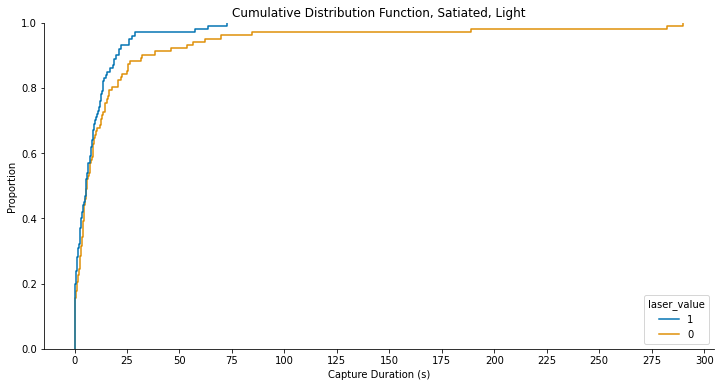

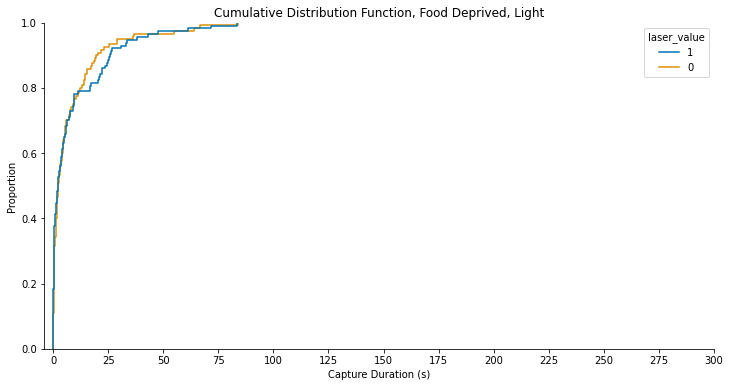

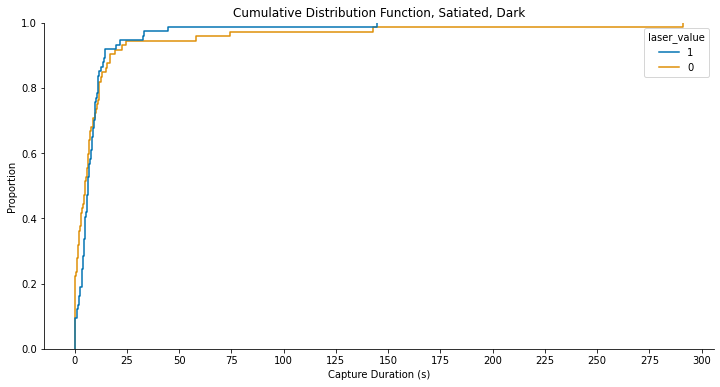

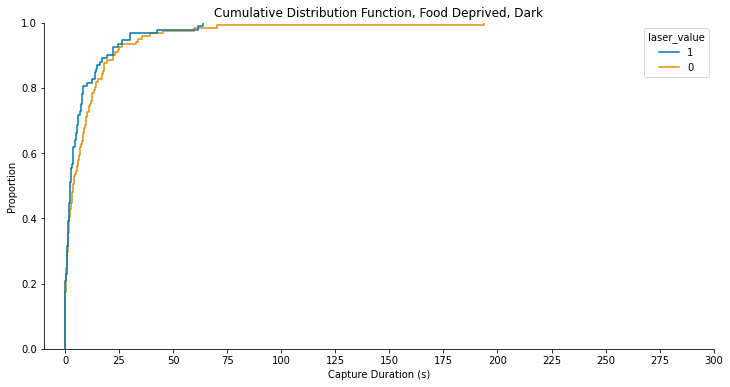

In [85]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond1, x='capduration', hue='laser_value',hue_order=hue_order, palette="colorblind")
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Light')
plt.xticks(np.arange(0, 325,25))
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_satiatedL.pdf')

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond2, x='capduration', hue='laser_value',hue_order=hue_order,palette="colorblind")
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Light')
plt.xticks(np.arange(0, 325,25))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_fooddepL.pdf')

fig3= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond3, x='capduration', hue='laser_value',hue_order=hue_order,palette="colorblind")
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark')
plt.xticks(np.arange(0, 325,25))
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_satiatedD.pdf')

fig4= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond4, x='capduration', hue='laser_value',hue_order=hue_order,palette="colorblind")
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Dark')
plt.xticks(np.arange(0, 325,25))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_fooddepD.pdf')

#### Emprircal cumulative distribtion function plots for capture durations, times over 300s removed.
###### return to [Table of Contents](#Table-of-Contents)

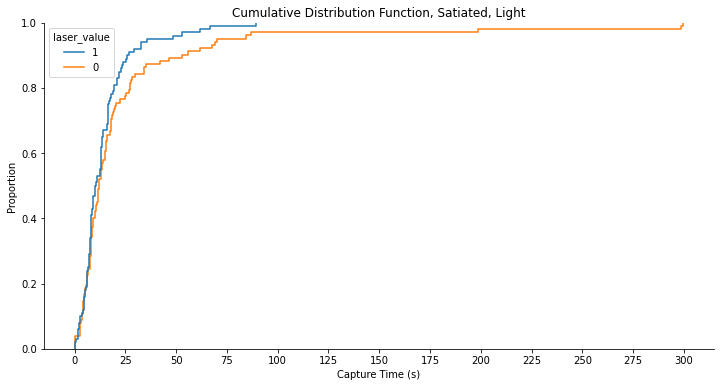

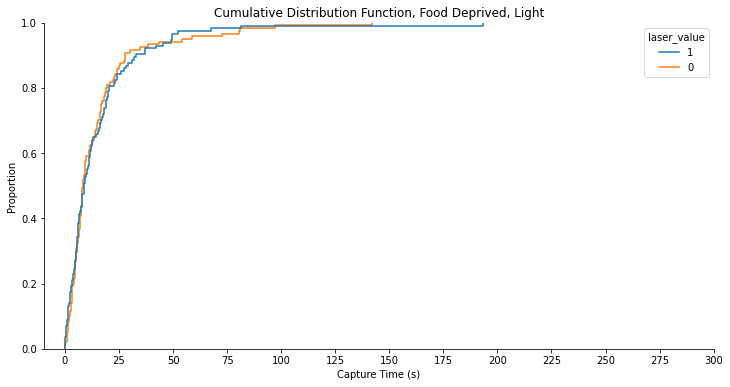

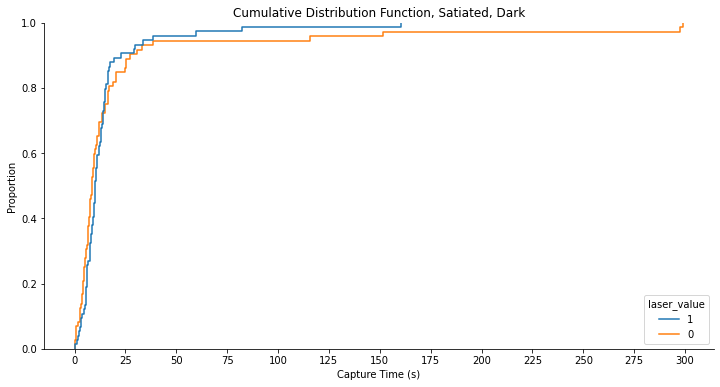

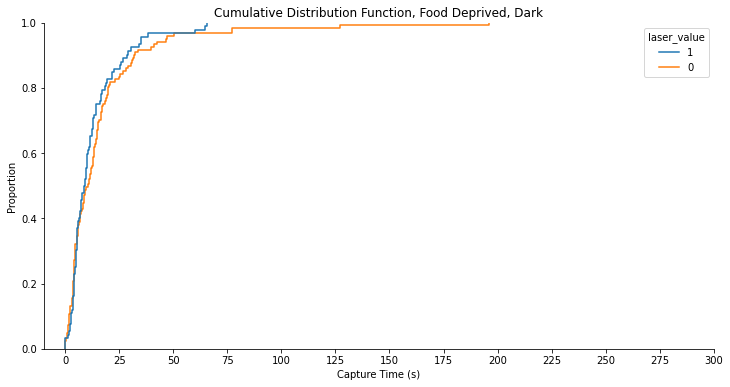

In [86]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond1, x='captureT', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Satiated, Light')
plt.xticks(np.arange(0, 325,25))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_satiatedL.pdf')

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond2, x='captureT', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Light')
plt.xticks(np.arange(0, 325,25))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_fooddepL.pdf')

fig3= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond3, x='captureT', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark')
plt.xticks(np.arange(0, 325,25))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_satiatedD.pdf')

fig4= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond4, x='captureT', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Dark')
plt.xticks(np.arange(0, 325,25))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_fooddepD.pdf')

#### cumulative distribution plots for new mice

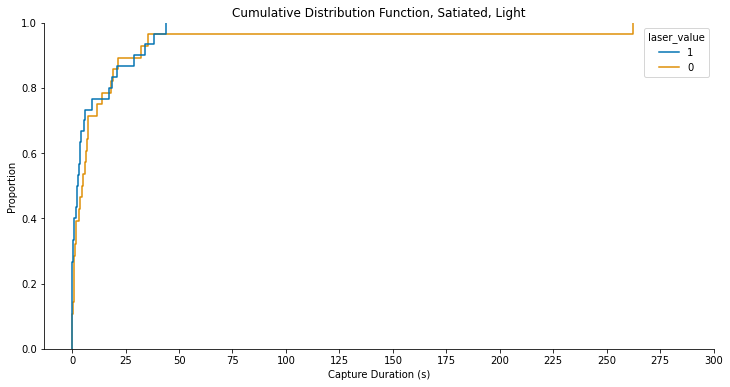

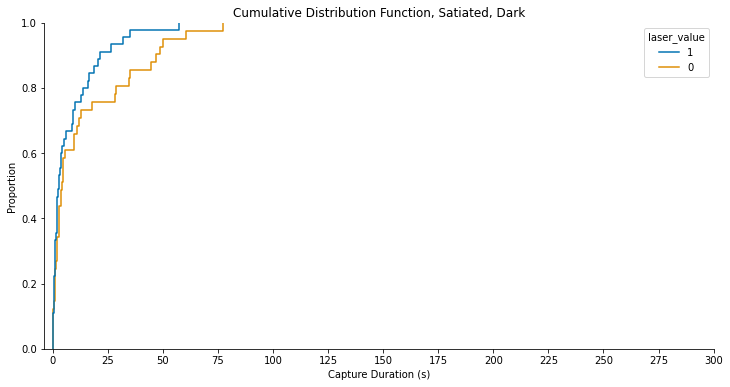

In [153]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond1_laser, x='capduration', hue='laser_value',hue_order=hue_order, palette="colorblind")
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Light')
plt.xticks(np.arange(0, 325,25))
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_satiatedL_new.pdf')

# fig2= plt.figure(figsize=(12,6))
# ax=sns.ecdfplot(data=cond1_laser, x='captureT', hue='laser_value',hue_order=hue_order, palette="colorblind")
# plt.xlabel('Capture Time (s)')
# plt.title('Cumulative Distribution Function, Satiated, Light')
# plt.xticks(np.arange(0, 325,25))
# sns.despine()

# fig2= plt.figure(figsize=(12,6))
# ax=sns.ecdfplot(data=cond2, x='capduration', hue='laser_value',hue_order=hue_order,palette="colorblind")
# plt.xlabel('Capture Duration (s)')
# plt.title('Cumulative Distribution Function, Food Deprived, Light')
# plt.xticks(np.arange(0, 325,25))
# sns.despine()
# # plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_fooddepL.pdf')

fig3= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond2_laser, x='capduration', hue='laser_value',hue_order=hue_order,palette="colorblind")
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark')
plt.xticks(np.arange(0, 325,25))
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_satiatedD_new.pdf')

# fig4= plt.figure(figsize=(12,6))
# ax=sns.ecdfplot(data=cond4, x='capduration', hue='laser_value',hue_order=hue_order,palette="colorblind")
# plt.xlabel('Capture Duration (s)')
# plt.title('Cumulative Distribution Function, Food Deprived, Dark')
# plt.xticks(np.arange(0, 325,25))
# sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_fooddepD.pdf')

#### Histograms (actual counts) overlayed with kernal desnsity estimation plots for capture times, times over 300s removed.
###### return to [Table of Contents](#Table-of-Contents)

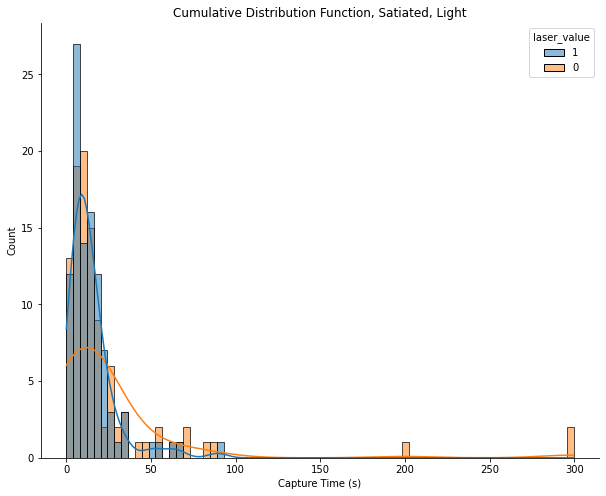

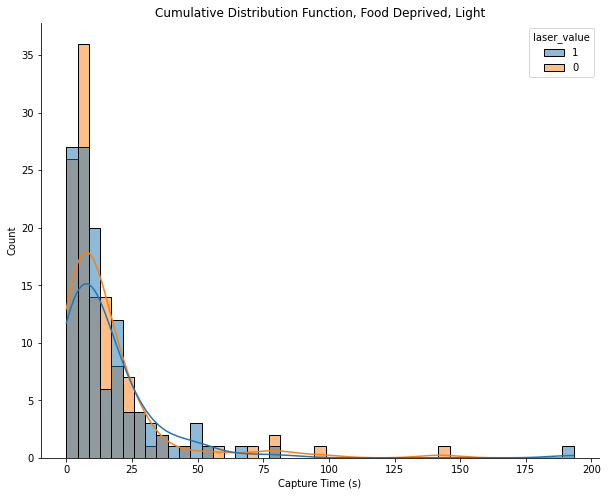

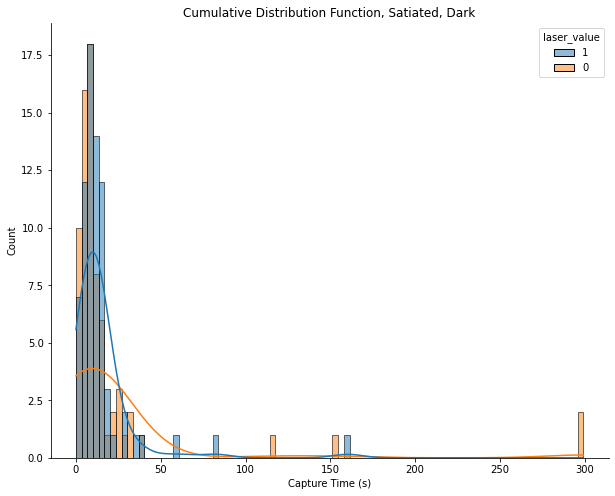

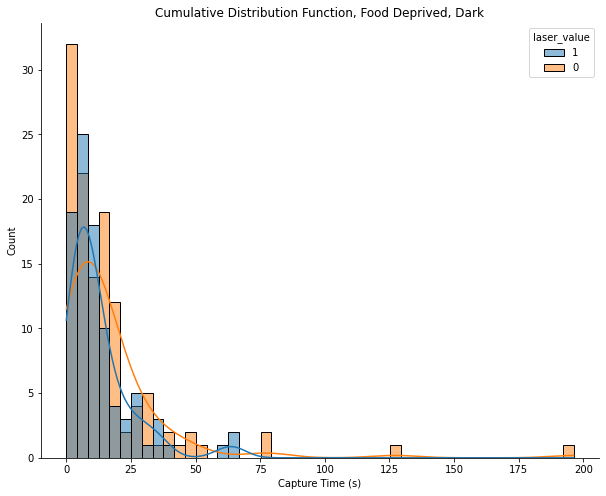

In [87]:
hue_order=[1,0]
fig1= plt.figure(figsize=(10,8))
sns.histplot(data=cond1, x='captureT', hue='laser_value', kde=True, hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Satiated, Light')
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_satiatedL.pdf')

fig2= plt.figure(figsize=(10,8))
sns.histplot(data=cond2, x='captureT', hue='laser_value', kde=True,hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Light')
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_fooddepL.pdf')

fig3= plt.figure(figsize=(10,8))
sns.histplot(data=cond3, x='captureT', hue='laser_value', kde=True,hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark')
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_satiatedD.pdf')

fig4= plt.figure(figsize=(10,8))
sns.histplot(data=cond4, x='captureT', hue='laser_value', kde=True,hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Dark')
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_fooddepD.pdf')

#### Histograms (actual counts) overlayed with kernal desnsity estimation plots for capture durations, times over 300s removed.
###### return to [Table of Contents](#Table-of-Contents)

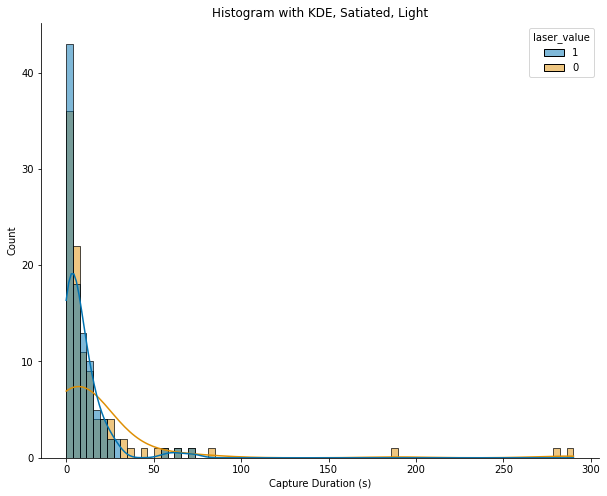

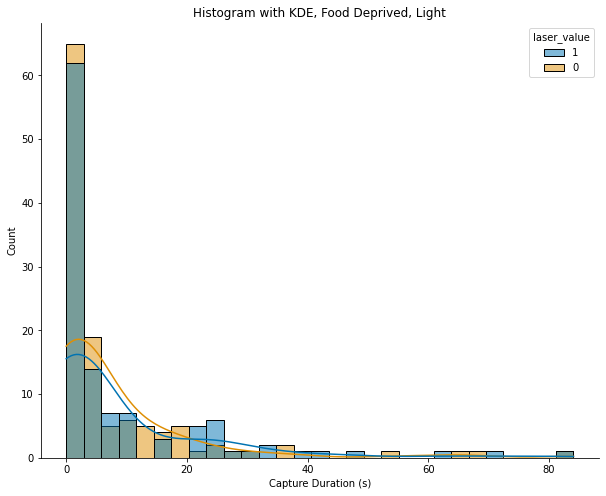

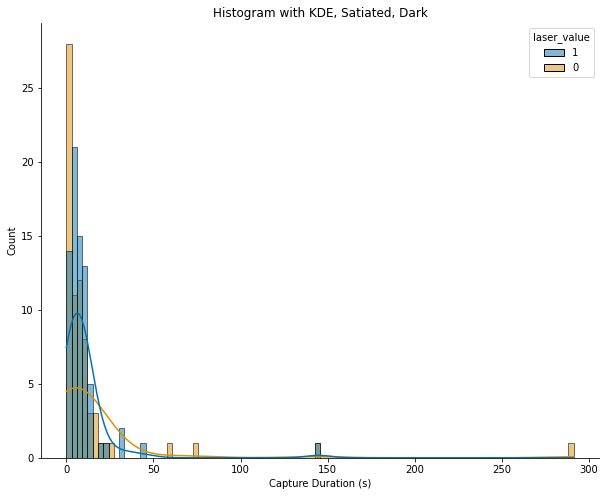

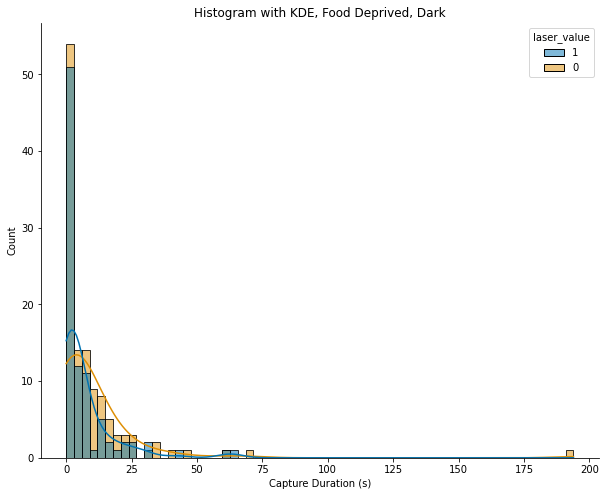

In [88]:
hue_order=[1,0]
fig1= plt.figure(figsize=(10,8))
sns.histplot(data=cond1, x='capduration', hue='laser_value', kde=True,hue_order=hue_order,palette="colorblind")
# plt.xlim(0,120)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Satiated, Light')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_satiatedL.pdf')

fig2= plt.figure(figsize=(10,8))
sns.histplot(data=cond2, x='capduration', hue='laser_value', kde=True,hue_order=hue_order,palette="colorblind")
# plt.xlim(0,120)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Food Deprived, Light')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_fooddepL.pdf')

fig3= plt.figure(figsize=(10,8))
sns.histplot(data=cond3, x='capduration', hue='laser_value', kde=True,hue_order=hue_order,palette="colorblind")
# plt.xlim(0,120)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Satiated, Dark')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_satiatedD.pdf')

fig4= plt.figure(figsize=(10,8))
sns.histplot(data=cond4, x='capduration', hue='laser_value', kde=True,hue_order=hue_order,palette="colorblind")
# plt.xlim(0,120)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Food Deprived, Dark')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_fooddepD.pdf')

#### histograms and KDE for new mice

Text(0.5, 1.0, 'Histogram with KDE, Satiated, Light')

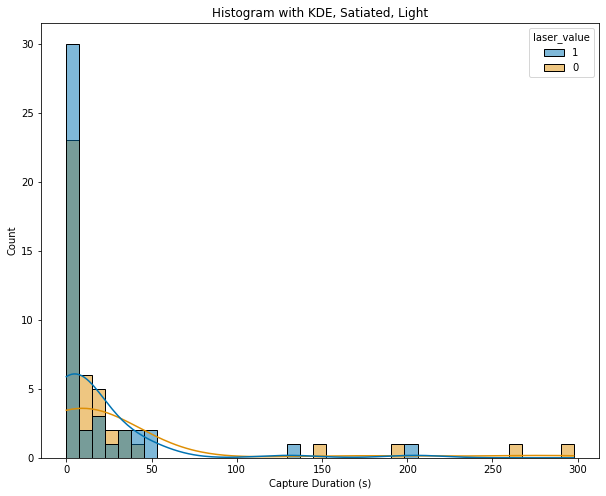

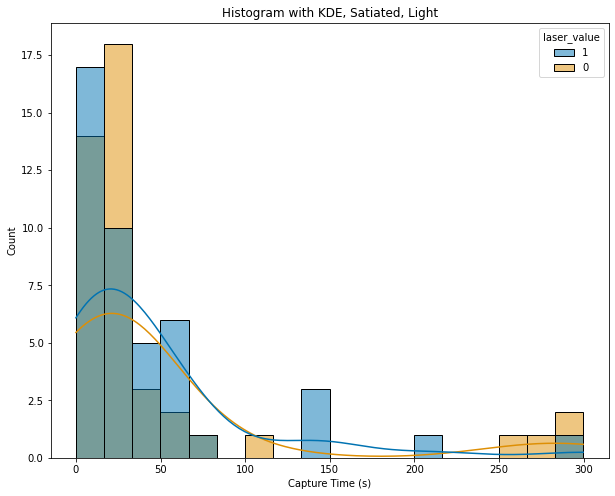

In [64]:
fig1= plt.figure(figsize=(10,8))
sns.histplot(data=cond1_laser, x='capduration', hue='laser_value', kde=True,hue_order=hue_order,palette="colorblind")
# plt.xlim(0,120)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Satiated, Light')

fig1= plt.figure(figsize=(10,8))
sns.histplot(data=cond1_laser, x='captureT', hue='laser_value', kde=True,hue_order=hue_order,palette="colorblind")
# plt.xlim(0,120)
plt.xlabel('Capture Time (s)')
plt.title('Histogram with KDE, Satiated, Light')

<a id= 'Distributions-120s' ></a>
#### Histograms (actual counts) overlayed with kernal desnsity estimation plots for capture times, times over 120s removed. First set of plots uses the df_120s generated as a separate h5 file. Another set of plots for 120s cutoff also created using an alternative method of replacing longer capture times with NaN based on basic testing.
###### return to [Table of Contents](#Table-of-Contents)

In [89]:
hue_order=[1,0]
fig1= plt.figure(figsize=(10,8))
sns.histplot(data=cond1_120, x='captureT', hue='laser_value', kde=True, hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Histogram with KDE, Satiated, Light, 120s')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_satiatedL120.pdf')

fig2= plt.figure(figsize=(10,8))
sns.histplot(data=cond2_120, x='captureT', hue='laser_value', kde=True,hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Histogram with KDE, Food Deprived, Light, 120s')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_fooddepL120.pdf')

fig3= plt.figure(figsize=(10,8))
sns.histplot(data=cond3_120, x='captureT', hue='laser_value', kde=True,hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Histogram with KDE, Satiated, Dark, 120s')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_satiatedD120.pdf')

fig4= plt.figure(figsize=(10,8))
sns.histplot(data=cond4_120, x='captureT', hue='laser_value', kde=True,hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Histogram with KDE, Food Deprived, Dark, 120s')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_fooddepD120.pdf')

NameError: name 'cond1_120' is not defined

<Figure size 720x576 with 0 Axes>

#### Histograms (actual counts) overlayed with kernal desnsity estimation plots for capture durations, times over 120s removed. First set of plots uses the df_120s generated as a separate h5 file. Another set of plots for 120s cutoff also created using an alternative method of replacing longer capture times with NaN based on basic testing.
###### return to [Table of Contents](#Table-of-Contents)

In [90]:
hue_order=[1,0]
fig1= plt.figure(figsize=(10,8))
sns.histplot(data=cond1_120, x='capduration', hue='laser_value', kde=True,hue_order=hue_order)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Satiated, Light, 120s')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_satiatedL120.pdf')

fig2= plt.figure(figsize=(10,8))
sns.histplot(data=cond2_120, x='capduration', hue='laser_value', kde=True,hue_order=hue_order)
# plt.xlim(0,120)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Food Deprived, Light, 120s')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_fooddepL120.pdf')

fig3= plt.figure(figsize=(10,8))
sns.histplot(data=cond3_120, x='capduration', hue='laser_value', kde=True,hue_order=hue_order)
# plt.xlim(0,120)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Satiated, Dark, 120s')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_satiatedD120.pdf')

fig4= plt.figure(figsize=(10,8))
sns.histplot(data=cond4_120, x='capduration', hue='laser_value', kde=True,hue_order=hue_order)
# plt.xlim(0,120)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Food Deprived, Dark, 120s')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_fooddepD120.pdf')

NameError: name 'cond1_120' is not defined

<Figure size 720x576 with 0 Axes>

#### Empirircal cumulative distribution function plots for capture times, times over 120s removed. First set of plots uses the df_120s generated as a separate h5 file. Another set of plots for 120s cutoff also created using an alternative method of replacing longer capture times with NaN based on basic testing.
###### return to [Table of Contents](#Table-of-Contents)

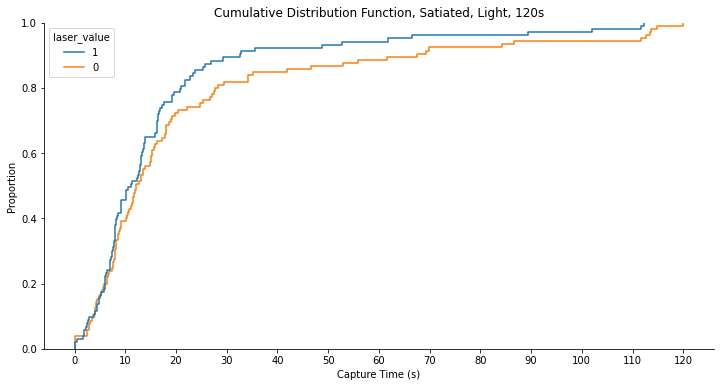

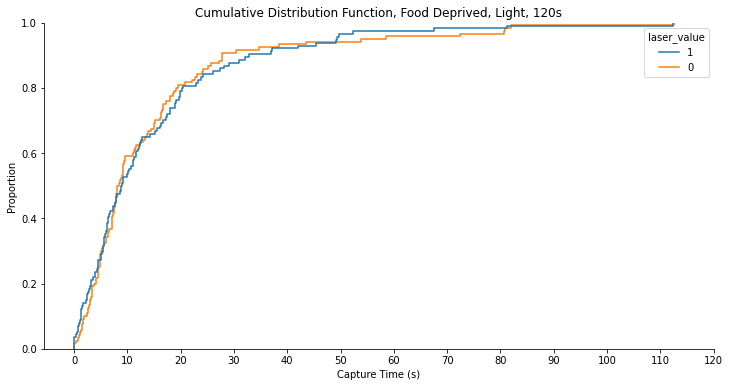

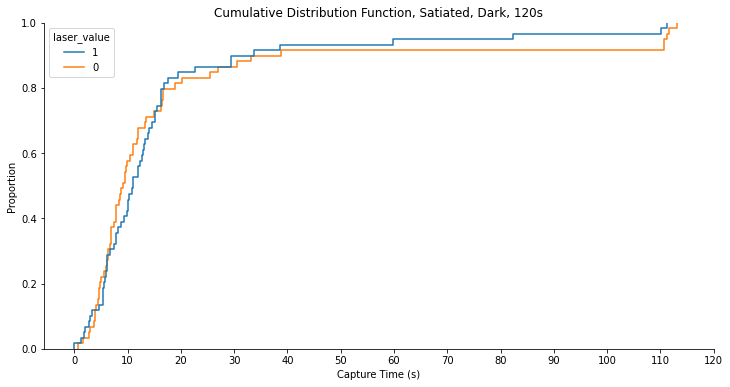

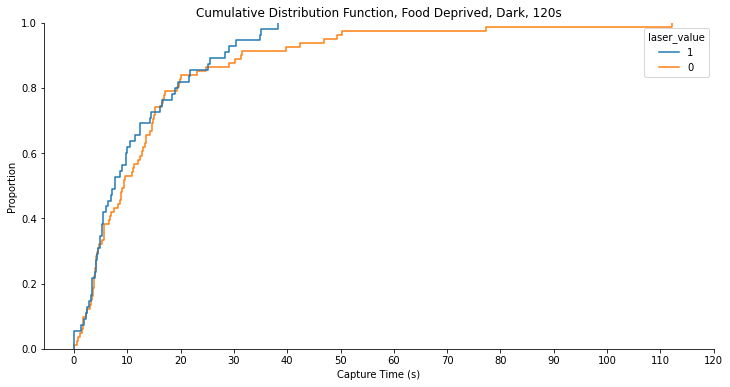

In [666]:
hue_order=[1,0]
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond1_120, x='captureT', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Satiated, Light, 120s')
plt.xticks(np.arange(0,125,10))
sns.despine()
# plt.savefig('capT_satiatedL_120.pdf')

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond2_120, x='captureT', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Light, 120s')
plt.xticks(np.arange(0,125,10))
sns.despine()
# plt.savefig('capT_fooddepL_120.pdf')

fig3= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond3_120, x='captureT', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark, 120s')
plt.xticks(np.arange(0,125,10))
sns.despine()
# plt.savefig('capT_satiatedD_120.pdf')

fig4= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond4_120, x='captureT', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Dark, 120s')
plt.xticks(np.arange(0,125,10))
sns.despine()
# plt.savefig('capT_fooddepD_120.pdf')


#### Empirircal cumulative distribution function plots for capture duration, times over 120s removed. First set of plots uses the df_120s generated as a separate h5 file. Another set of plots for 120s cutoff also created using an alternative method of replacing longer capture times with NaN based on basic testing.
###### return to [Table of Contents](#Table-of-Contents)

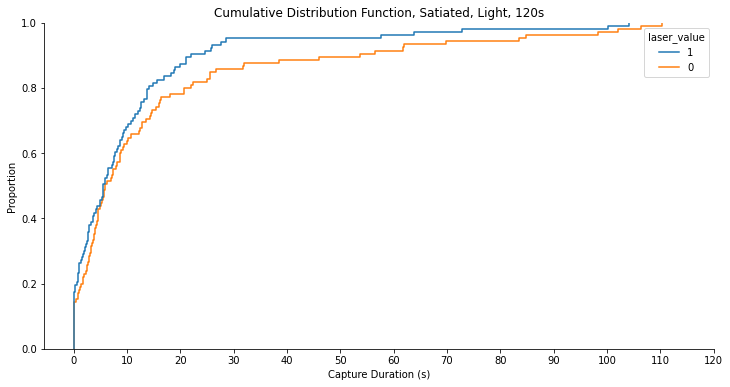

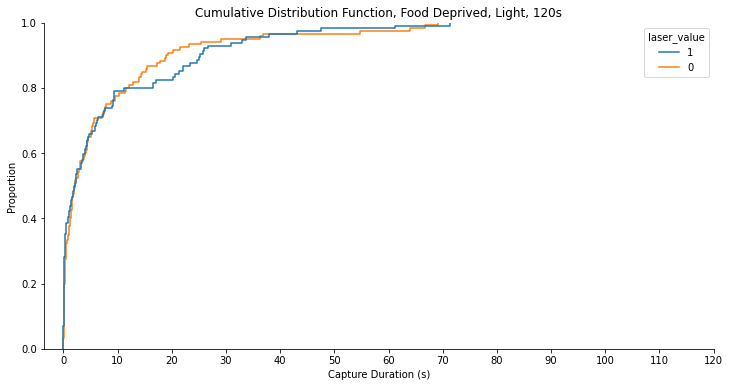

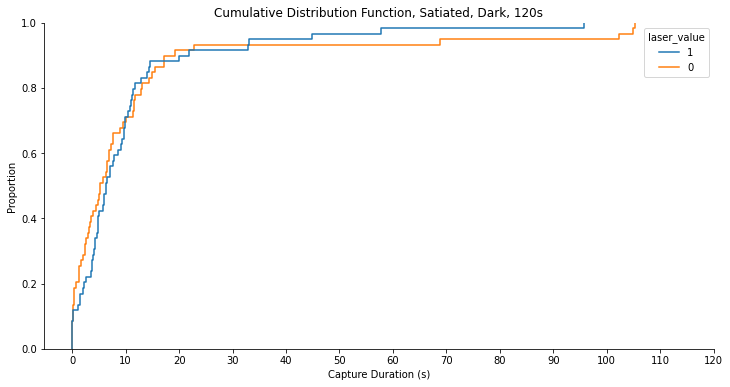

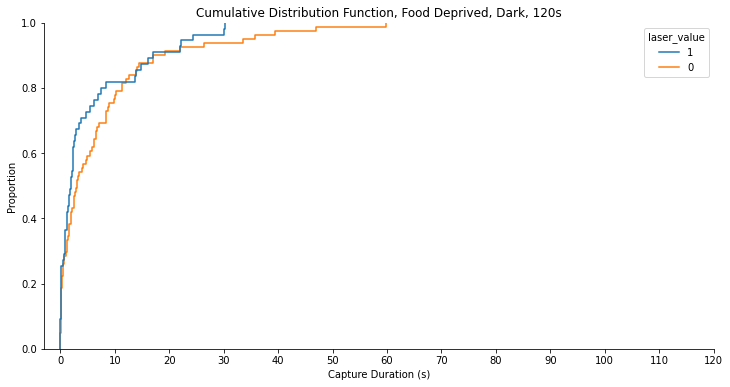

In [667]:
hue_order=hue_order
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond1_120, x='capduration', hue='laser_value', hue_order=hue_order)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Light, 120s')
plt.xticks(np.arange(0,125,10))
sns.despine()
# plt.savefig('capduration_satiatedL_120.pdf')

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond2_120, x='capduration', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Light, 120s')
plt.xticks(np.arange(0,125,10))
sns.despine()
# plt.savefig('capduration_fooddepL_120.pdf')

fig3= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond3_120, x='capduration', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark, 120s')
plt.xticks(np.arange(0,125,10))
sns.despine()
# plt.savefig('capduration_satiatedD_120.pdf')

fig4= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond4_120, x='capduration', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Dark, 120s')
plt.xticks(np.arange(0,125,10))
sns.despine()
# plt.savefig('capduration_fooddepD_120.pdf')

#### ECDF and histogram-KDE plots for capture time and duration, times over 120s removed. These plots used the df with NaNs replacing times longer than 120s that was done in line in this notebook, shows counts for NaNs unlike df_120s.
###### return to [Table of Contents](#Table-of-Contents)

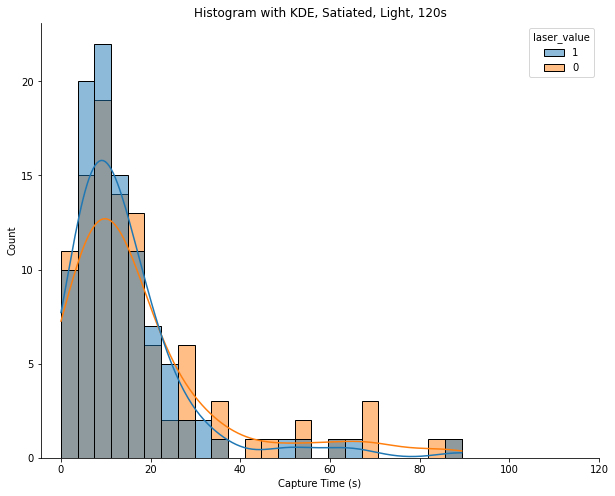

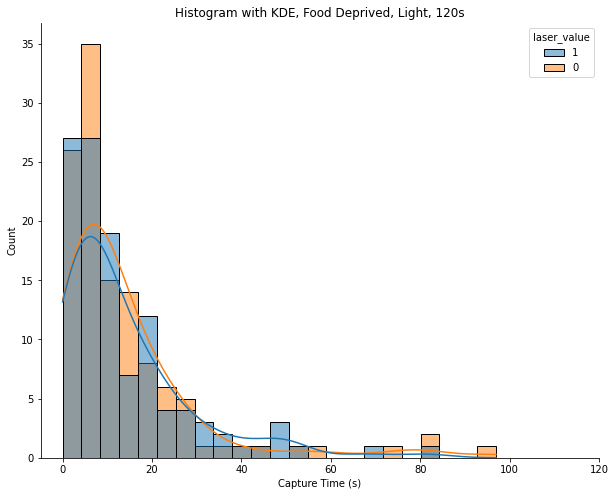

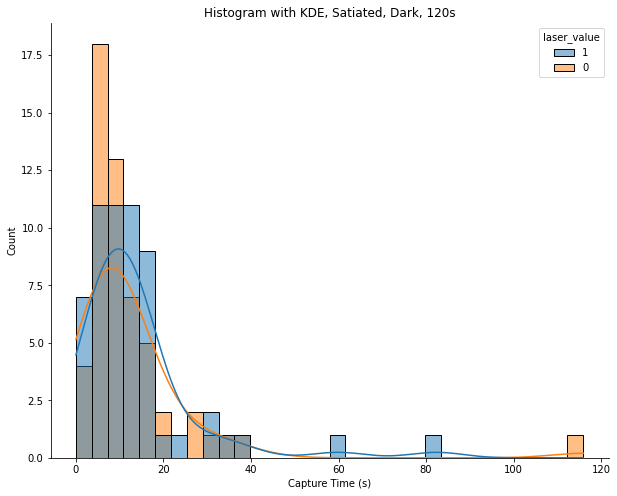

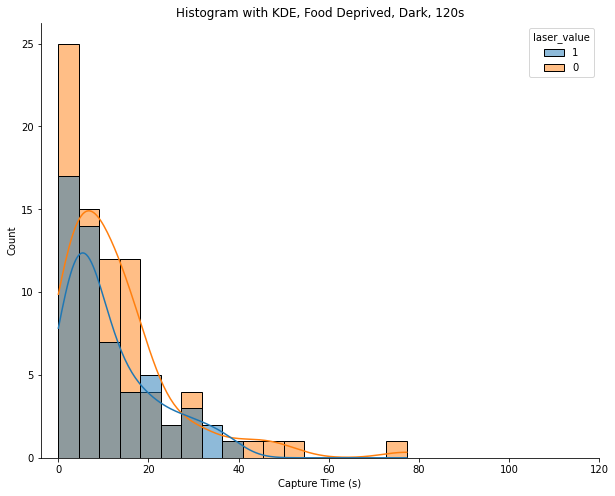

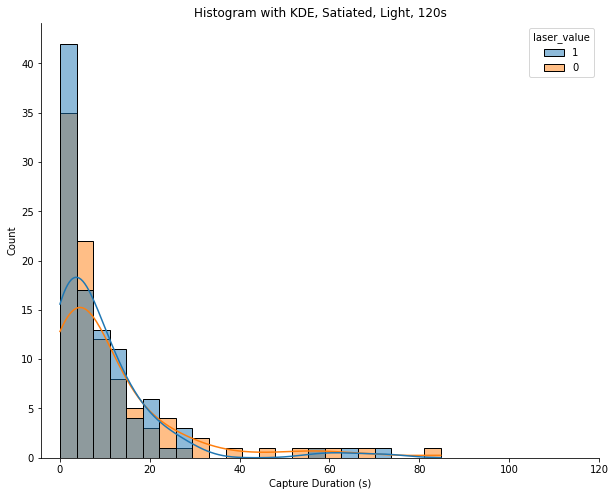

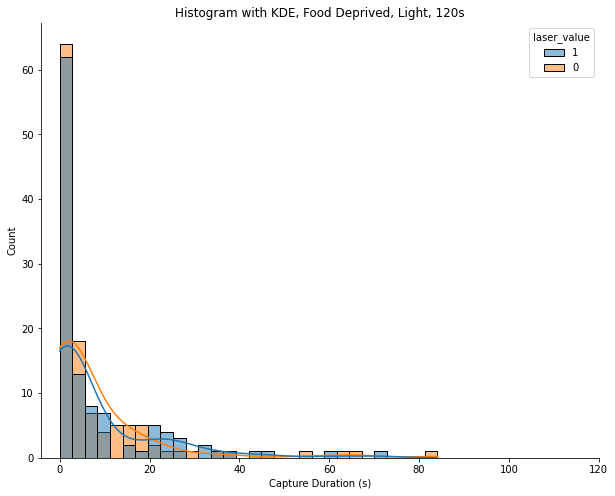

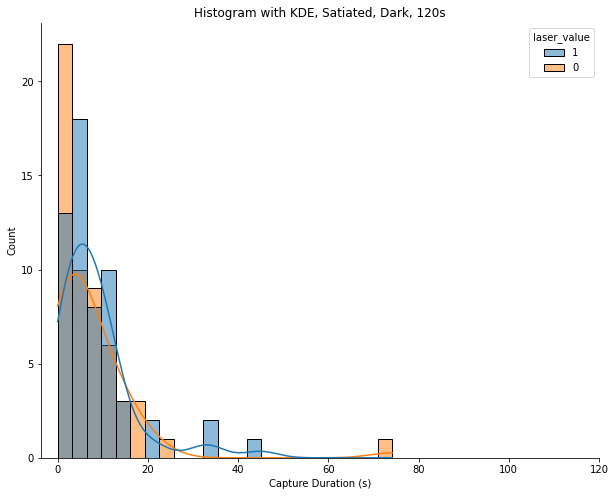

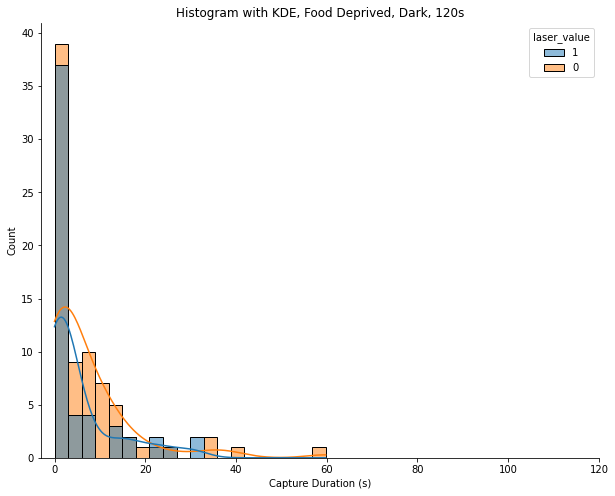

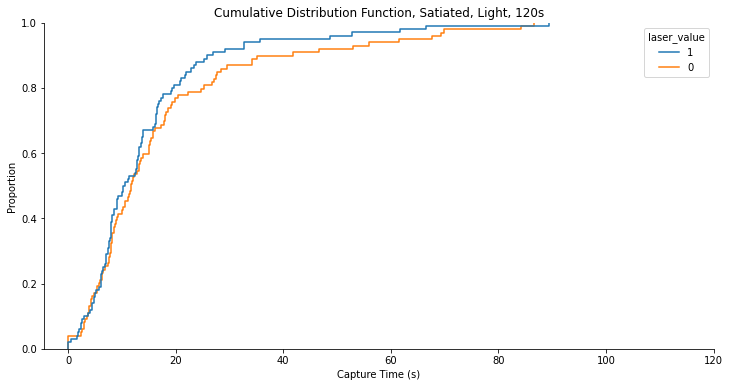

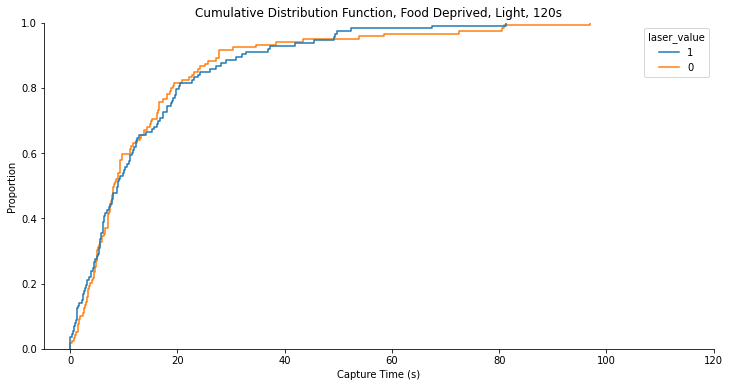

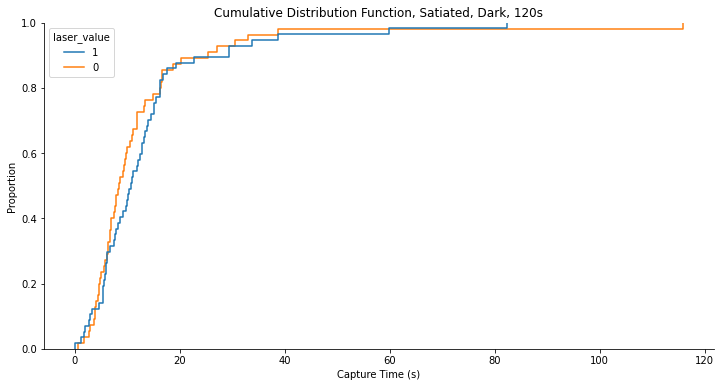

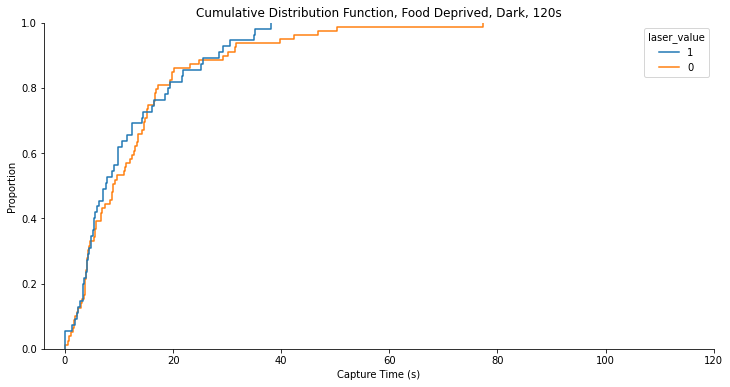

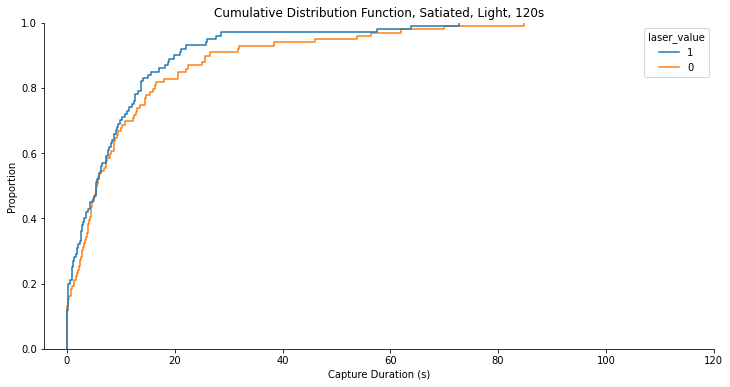

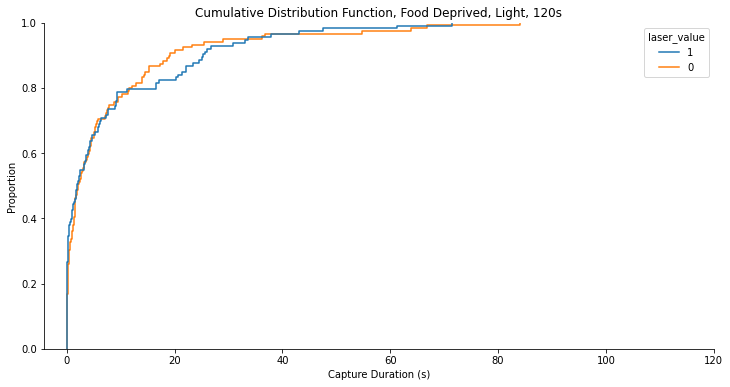

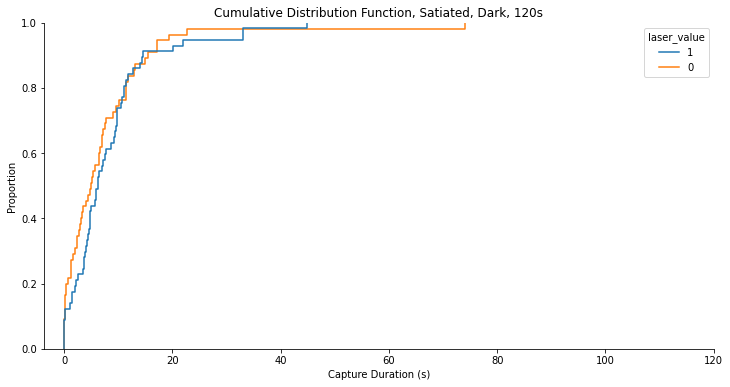

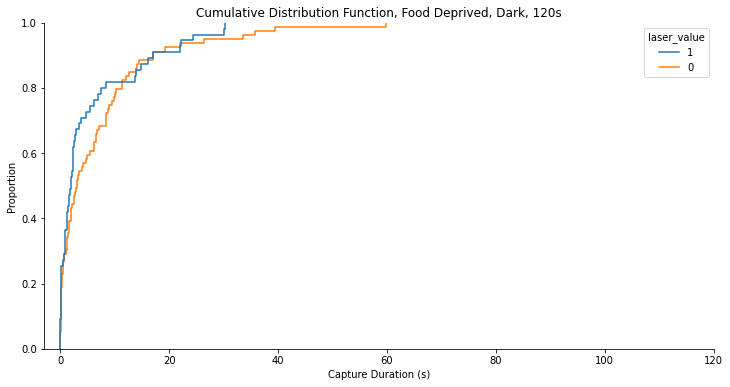

In [672]:
###TIME TO CAP KDE
fig1= plt.figure(figsize=(10,8))
sns.histplot(data=newcond1_120, x='captureT', hue='laser_value', kde=True, hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Histogram with KDE, Satiated, Light, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_satiatedL120.pdf')

fig2= plt.figure(figsize=(10,8))
sns.histplot(data=newcond2_120, x='captureT', hue='laser_value', kde=True,hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Histogram with KDE, Food Deprived, Light, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_fooddepL120.pdf')

fig3= plt.figure(figsize=(10,8))
sns.histplot(data=newcond3_120, x='captureT', hue='laser_value', kde=True,hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Histogram with KDE, Satiated, Dark, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_satiatedD120.pdf')

fig4= plt.figure(figsize=(10,8))
sns.histplot(data=newcond4_120, x='captureT', hue='laser_value', kde=True,hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Histogram with KDE, Food Deprived, Dark, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capT_hist_fooddepD120.pdf')

###CAP DURATION KDE
fig1= plt.figure(figsize=(10,8))
sns.histplot(data=newcond1_120, x='capduration', hue='laser_value', kde=True,hue_order=hue_order)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Satiated, Light, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_satiatedL120.pdf')

fig2= plt.figure(figsize=(10,8))
sns.histplot(data=newcond2_120, x='capduration', hue='laser_value', kde=True,hue_order=hue_order)
# plt.xlim(0,120)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Food Deprived, Light, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_fooddepL120.pdf')

fig3= plt.figure(figsize=(10,8))
sns.histplot(data=newcond3_120, x='capduration', hue='laser_value', kde=True,hue_order=hue_order)
# plt.xlim(0,120)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Satiated, Dark, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_satiatedD120.pdf')

fig4= plt.figure(figsize=(10,8))
sns.histplot(data=newcond4_120, x='capduration', hue='laser_value', kde=True,hue_order=hue_order)
# plt.xlim(0,120)
plt.xlabel('Capture Duration (s)')
plt.title('Histogram with KDE, Food Deprived, Dark, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Git/Prey_Capture_Python/figures/capduration_hist_fooddepD120.pdf')

##TIME TO CAP CDF
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=newcond1_120, x='captureT', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Satiated, Light, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('capT_satiatedL_120.pdf')

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=newcond2_120, x='captureT', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Light, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('capT_fooddepL_120.pdf')

fig3= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=newcond3_120, x='captureT', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('capT_satiatedD_120.pdf')

fig4= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=newcond4_120, x='captureT', hue='laser_value', hue_order=hue_order)
plt.xlabel('Capture Time (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Dark, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('capT_fooddepD_120.pdf')

###CAP DURATION CDF
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=newcond1_120, x='capduration', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Light, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('capduration_satiatedL_120.pdf')

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=newcond2_120, x='capduration', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Light, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('capduration_fooddepL_120.pdf')

fig3= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=newcond3_120, x='capduration', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('capduration_satiatedD_120.pdf')

fig4= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=newcond4_120, x='capduration', hue='laser_value',hue_order=hue_order)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Food Deprived, Dark, 120s')
plt.xticks(np.arange(0, 125,20))
sns.despine()
# plt.savefig('capduration_fooddepD_120.pdf')

<a id= 'Cricket-Survival-Rate' ></a>
## Plotting for cricket survival fraction.
###### return to [Table of Contents](#Table-of-Contents)

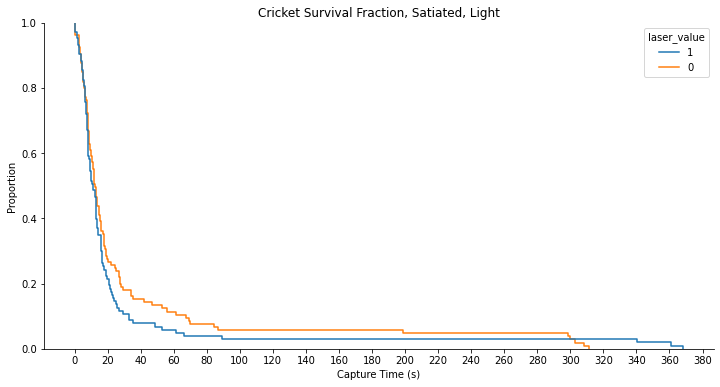

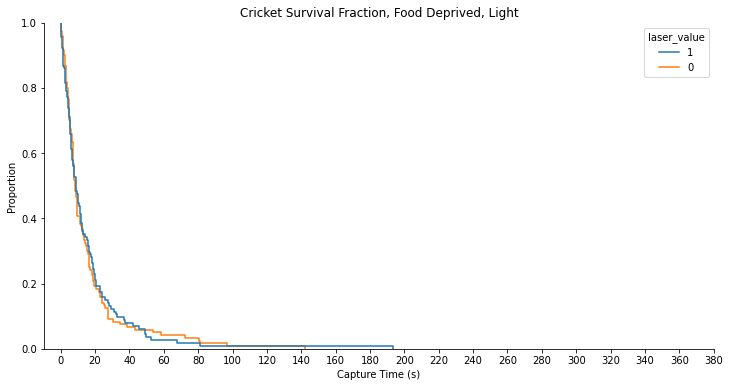

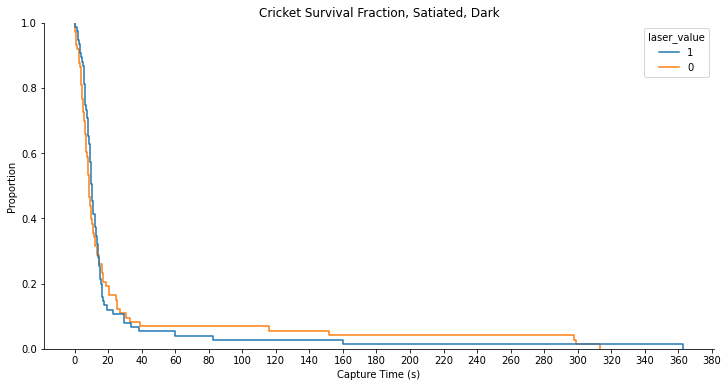

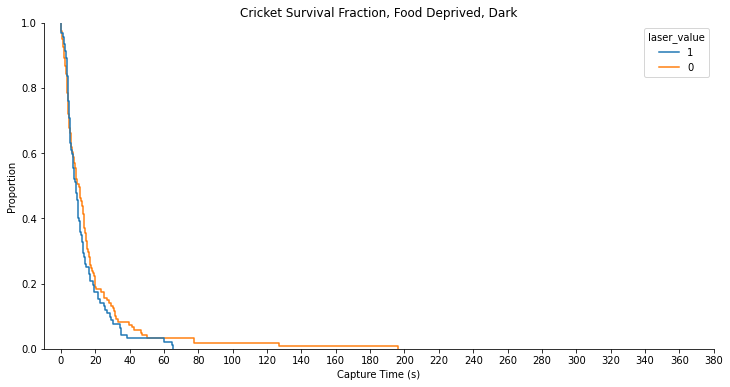

In [91]:

fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=allcond1, x='captureT', hue='laser_value',hue_order=hue_order, complementary=True)
plt.xlabel('Capture Time (s)')
plt.title('Cricket Survival Fraction, Satiated, Light')
plt.xticks(np.arange(0, 400,20))
sns.despine()
# plt.savefig('capT_satiatedL_120.pdf')

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=allcond2, x='captureT', hue='laser_value',hue_order=hue_order,complementary=True)
plt.xlabel('Capture Time (s)')
plt.title('Cricket Survival Fraction, Food Deprived, Light')
plt.xticks(np.arange(0, 400,20))
sns.despine()
# plt.savefig('capT_fooddepL_120.pdf')

fig3= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=allcond3, x='captureT', hue='laser_value',hue_order=hue_order,complementary=True)
plt.xlabel('Capture Time (s)')
plt.title('Cricket Survival Fraction, Satiated, Dark')
plt.xticks(np.arange(0, 400,20))
sns.despine()
# plt.savefig('capT_satiatedD_120.pdf')

fig4= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=allcond4, x='captureT', hue='laser_value',hue_order=hue_order, complementary=True)
plt.xlabel('Capture Time (s)')
plt.title('Cricket Survival Fraction, Food Deprived, Dark')
plt.xticks(np.arange(0, 400,20))
sns.despine()

#### Cricket survival fraction for new mice

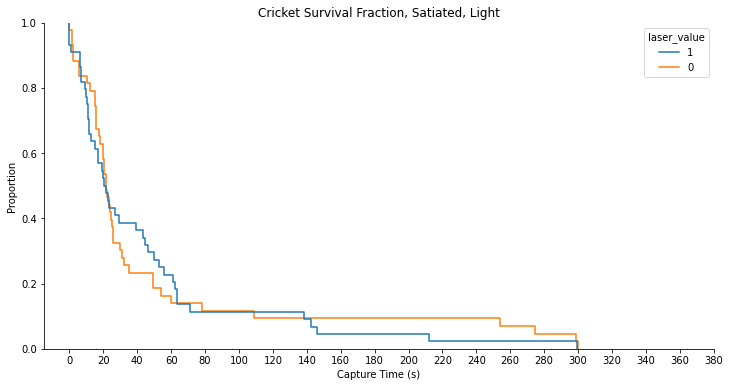

In [65]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=cond1_laser, x='captureT', hue='laser_value',hue_order=hue_order, complementary=True)
plt.xlabel('Capture Time (s)')
plt.title('Cricket Survival Fraction, Satiated, Light')
plt.xticks(np.arange(0, 400,20))
sns.despine()

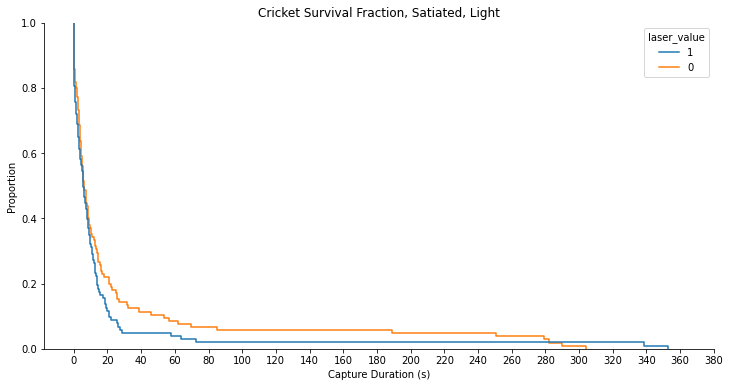

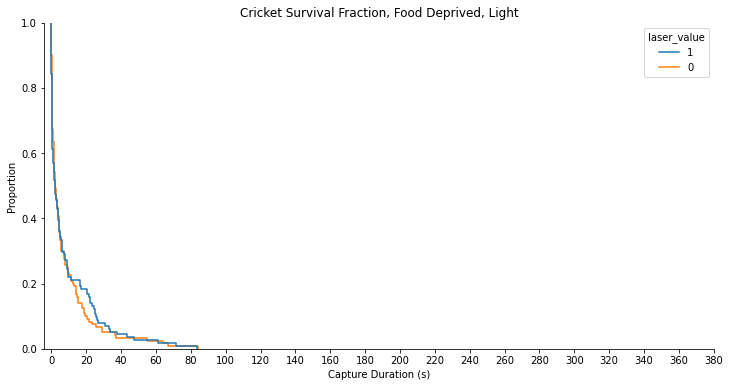

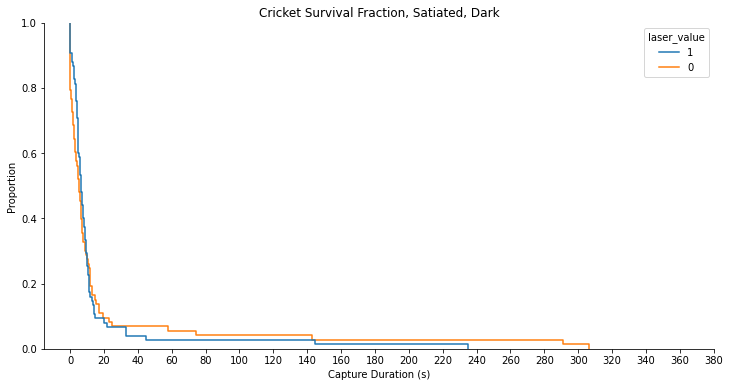

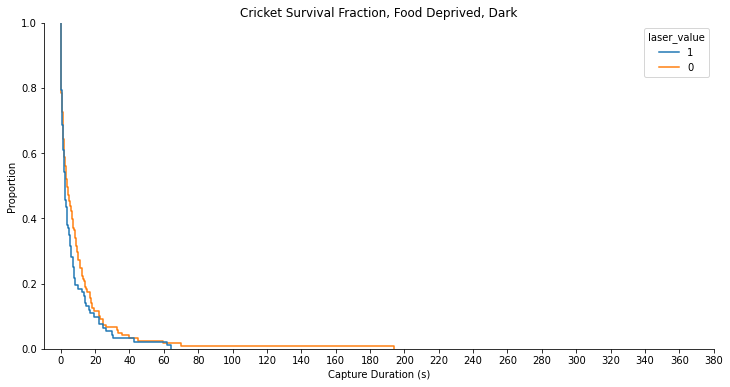

In [92]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=allcond1, x='capduration', hue='laser_value',hue_order=hue_order, complementary=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cricket Survival Fraction, Satiated, Light')
plt.xticks(np.arange(0, 400,20))
sns.despine()
# plt.savefig('capT_satiatedL_120.pdf')

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=allcond2, x='capduration', hue='laser_value',hue_order=hue_order,complementary=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cricket Survival Fraction, Food Deprived, Light')
plt.xticks(np.arange(0, 400,20))
sns.despine()
# plt.savefig('capT_fooddepL_120.pdf')

fig3= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=allcond3, x='capduration', hue='laser_value',hue_order=hue_order,complementary=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cricket Survival Fraction, Satiated, Dark')
plt.xticks(np.arange(0, 400,20))
sns.despine()
# plt.savefig('capT_satiatedD_120.pdf')

fig4= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=allcond4, x='capduration', hue='laser_value',hue_order=hue_order, complementary=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cricket Survival Fraction, Food Deprived, Dark')
plt.xticks(np.arange(0, 400,20))
sns.despine()

<a id= 'Stats' ></a>
# Statistics
###### return to [Table of Contents](#Table-of-Contents)

<a id= 'ANOVA' ></a>
## Messing around with some ANOVAs, not sure what any of them actually mean, or if this is the best way to deal with these data.
###### return to [Table of Contents](#Table-of-Contents)

In [93]:
statsdf=df[['condition','laser_value','captureT', 'capduration', 'timetoapproach','timetointercept']]

#perform 2-way anova
model=ols('captureT ~ C(condition) + C(laser_value) + C(condition):C(laser_value)', data=statsdf).fit()
sm.stats.anova_lm(model, typ=2)
          

,sum_sq,df,F,PR(>F)
C(condition),2.902762e+04,3.0,5.389136,0.001126
C(laser_value),3.530070e+03,1.0,1.966130,0.161250
C(condition):C(laser_value),2.334476e+03,3.0,0.433408,0.729138
Residual,1.427375e+06,795.0,NaN,NaN


In [94]:
#perform 2-way anova
model=ols('capduration ~ C(condition) + C(laser_value) + C(condition):C(laser_value)', data=statsdf).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(condition),2.311603e+04,3.0,6.063542,0.000440
C(laser_value),3.347448e+03,1.0,2.634198,0.104981
C(condition):C(laser_value),3.607748e+03,3.0,0.946345,0.417647
Residual,1.010259e+06,795.0,NaN,NaN


In [95]:
#perform 2-way anova
model=ols('timetoapproach ~ C(condition) + C(laser_value) + C(condition):C(laser_value)', data=statsdf).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(condition),97.723890,3.0,1.485635,0.217044
C(laser_value),9.702750,1.0,0.442515,0.506104
C(condition):C(laser_value),75.299150,3.0,1.144726,0.330097
Residual,17431.487459,795.0,NaN,NaN


In [96]:
#perform 2-way anova
model=ols('timetointercept ~ C(condition) + C(laser_value) + C(condition):C(laser_value)', data=statsdf).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(condition),460.506171,3.0,0.470432,0.702975
C(laser_value),2.425050,1.0,0.007432,0.931322
C(condition):C(laser_value),329.677110,3.0,0.336783,0.798750
Residual,259408.808538,795.0,NaN,NaN


In [97]:
statsnandf=nandf[['condition','laser_value','captureT', 'capduration', 'timetoapproach','timetointercept']]

#perform 2-way anova
model=ols('captureT ~ C(condition) + C(laser_value) + C(condition):C(laser_value)', data=statsnandf).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(condition),3967.488975,3.0,1.601889,0.187510
C(laser_value),4493.828761,1.0,5.443204,0.019896
C(condition):C(laser_value),3351.509958,3.0,1.353185,0.255936
Residual,649735.625753,787.0,NaN,NaN


In [98]:
#perform 2-way anova
model=ols('capduration ~ C(condition) + C(laser_value) + C(condition):C(laser_value)', data=statsnandf).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(condition),2.311603e+04,3.0,6.063542,0.000440
C(laser_value),3.347448e+03,1.0,2.634198,0.104981
C(condition):C(laser_value),3.607748e+03,3.0,0.946345,0.417647
Residual,1.010259e+06,795.0,NaN,NaN


In [99]:
statsdf120=nandf_120[['condition','laser_value','captureT', 'capduration', 'timetoapproach','timetointercept']]

#perform 2-way anova
model=ols('captureT ~ C(condition) + C(laser_value) + C(condition):C(laser_value)', data=statsdf120).fit()
sm.stats.anova_lm(model, typ=2)

NameError: name 'nandf_120' is not defined

In [487]:
#perform 2-way anova
model=ols('capduration ~ C(condition) + C(laser_value) + C(condition):C(laser_value)', data=statsdf120).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(condition),1304.878184,3.0,2.854199,0.036491
C(laser_value),98.225202,1.0,0.644553,0.422352
C(condition):C(laser_value),328.031279,3.0,0.717513,0.541727
Residual,101950.796496,669.0,NaN,NaN


<a id= 'KS-Test' ></a>
## Messing around with K-S tests for the cdf curves, not sure I'm doing this correctly, definitely a WiP.
###### return to [Table of Contents](#Table-of-Contents)

In [102]:
stats.kstest(cond1_off['captureT'], cond1_on['captureT'], 'norm', alternative='two-sided')

KstestResult(statistic=0.11206657420249654, pvalue=0.4780732237660811)

In [511]:
stats.ks_2samp(cond2_off['captureT'], cond2_on['captureT'])

KstestResult(statistic=0.07324561403508772, pvalue=0.8812437596275765)

In [508]:
stats.ks_2samp(cond3_off['captureT'], cond3_on['captureT'])

KstestResult(statistic=0.15254237288135594, pvalue=0.5020556560146455)

In [509]:
stats.ks_2samp(cond4_off['captureT'], cond4_on['captureT'])

KstestResult(statistic=0.11784511784511785, pvalue=0.6985253626226461)

### Levene's test: tests for rejection of the null hypothesis that all samples come from equal distributions. 

In [130]:
stats.levene(cond1_on['captureT'],cond1_off['captureT'], cond2_on['captureT'],cond2_off['captureT'], cond3_on['captureT'],cond3_off['captureT'], cond4_on['captureT'], cond4_off['captureT'], center='trimmed')

LeveneResult(statistic=6.357681553276809, pvalue=2.8762237230852826e-07)

In [128]:
stats.ttest_ind(cond1_on['captureT'],cond1_off['captureT'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-2.1559069489840503, pvalue=0.03309367566631591)

In [123]:
stats.ttest_ind(cond2_on['captureT'],cond2_off['captureT'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=0.10950863361079846, pvalue=0.9128957003487571)

In [124]:
stats.ttest_ind(cond3_on['captureT'],cond3_off['captureT'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-1.059018225759068, pvalue=0.2923323848452828)

In [125]:
stats.ttest_ind(cond4_on['captureT'],cond4_off['captureT'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-1.3665096069685194, pvalue=0.1733761134820675)

In [22]:
stats.kruskal(cond1['captureT'], cond2['captureT'], cond3['captureT'], cond4['captureT'], nan_policy='omit')

KruskalResult(statistic=9.084327474817398, pvalue=0.028190464957027737)

In [104]:
std_nandf=nandf.groupby(['condition','laser_value']).std()
temp=std_nandf[['captureT', 'capduration']]
std=pd.DataFrame(temp)
std=std.reset_index()
std

,condition,laser_value,captureT,capduration
0,Condition1,0.0,46.436242,61.965131
1,Condition1,1.0,14.017938,48.266472
2,Condition2,0.0,20.262468,13.747852
3,Condition2,1.0,22.238929,14.842068
4,Condition3,0.0,52.021433,51.425448
5,Condition3,1.0,21.020430,31.319324
6,Condition4,0.0,23.861891,20.552083
7,Condition4,1.0,12.849252,11.598238


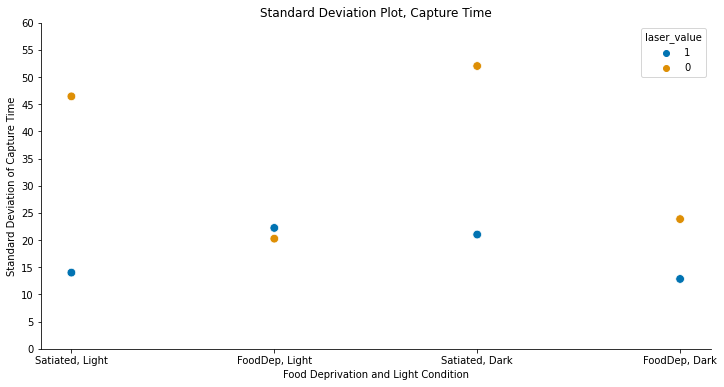

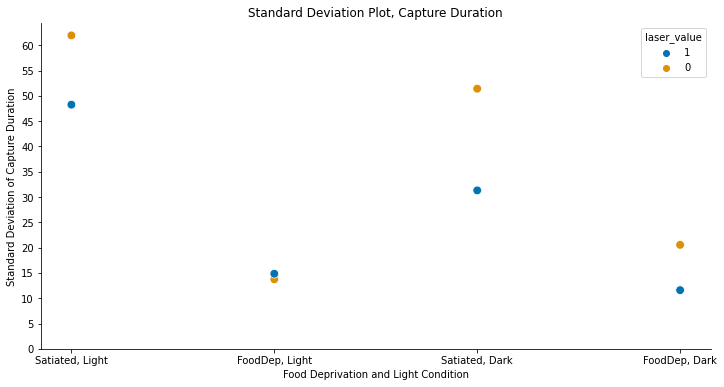

In [106]:
fig1= plt.figure(figsize=(12,6))
sns.scatterplot(data=std,x='condition', y='captureT', hue='laser_value', hue_order=hue_order, palette='colorblind', s=75)
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
plt.yticks(np.arange(0,65,5))
plt.ylabel('Standard Deviation of Capture Time')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Deviation Plot, Capture Time')
sns.despine()

fig2= plt.figure(figsize=(12,6))
sns.scatterplot(data=std,x='condition', y='capduration', hue='laser_value', hue_order=hue_order, palette='colorblind', s=75)
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
plt.yticks(np.arange(0,65,5))
plt.ylabel('Standard Deviation of Capture Duration')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Deviation Plot, Capture Duration')
sns.despine()

In [107]:
sem_nandf=nandf.groupby(['condition','laser_value']).sem()
temp=sem_nandf[['captureT', 'capduration']]
sem=pd.DataFrame(temp)
sem=sem.reset_index()
sem

,condition,laser_value,captureT,capduration
0,Condition1,0.0,4.597873,6.047178
1,Condition1,1.0,1.401794,4.755837
2,Condition2,0.0,1.849702,1.255001
3,Condition2,1.0,2.082867,1.390087
4,Condition3,0.0,6.130785,6.018893
5,Condition3,1.0,2.443575,3.616444
6,Condition4,0.0,2.169263,1.868371
7,Condition4,1.0,1.339627,1.209200


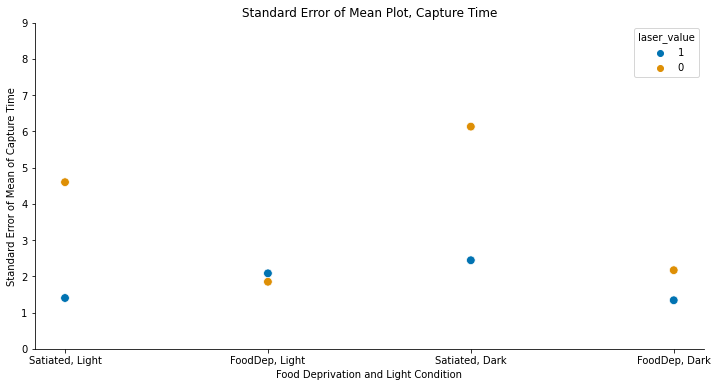

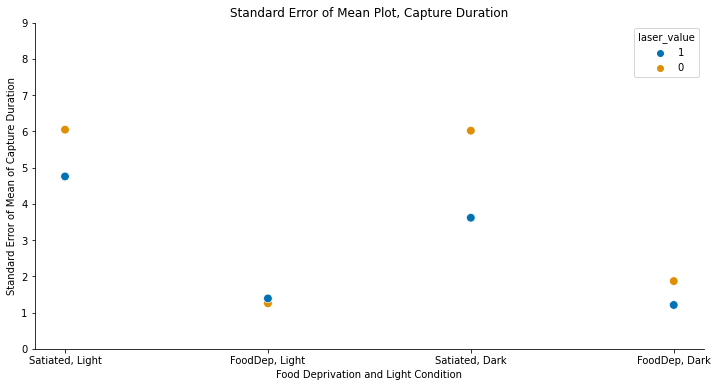

In [108]:
fig1= plt.figure(figsize=(12,6))
sns.scatterplot(data=sem,x='condition', y='captureT', hue='laser_value', hue_order=hue_order, palette='colorblind', s=75)
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
plt.yticks(np.arange(0,10,1))
plt.ylabel('Standard Error of Mean of Capture Time')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Error of Mean Plot, Capture Time')
sns.despine()

fig2= plt.figure(figsize=(12,6))
sns.scatterplot(data=sem,x='condition', y='capduration', hue='laser_value', hue_order=hue_order, palette='colorblind',s=75)
plt.xticks([0,1,2,3],['Satiated, Light', 'FoodDep, Light', 'Satiated, Dark', 'FoodDep, Dark'])
plt.yticks(np.arange(0,10,1))
plt.ylabel('Standard Error of Mean of Capture Duration')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Error of Mean Plot, Capture Duration')
sns.despine()

In [116]:
[np.var(x, ddof=1) for x in [cond1_on['captureT'],cond1_off['captureT'], cond2_on['captureT'],cond2_off['captureT'], cond3_on['captureT'],cond3_off['captureT'], cond4_on['captureT'], cond4_off['captureT']]]

[196.5025951388889,
 2156.3245453334303,
 494.5699460972676,
 410.56760754726895,
 441.85845663180294,
 2706.2294841500384,
 165.10326673136646,
 569.3898547279613]

#### SEM and Standard Deviation plots for new mice

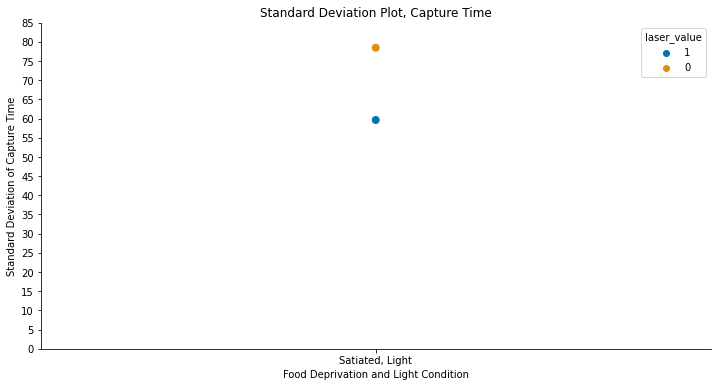

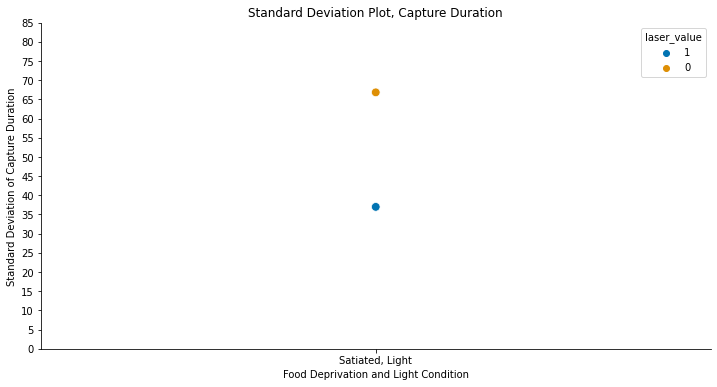

In [73]:
std_dflaser=df_laser.groupby(['condition','laser_value']).std()
temp=std_dflaser[['captureT', 'capduration']]
std_laser=pd.DataFrame(temp)
std_laser=std_laser.reset_index()
std_laser

sem_dflaser=df_laser.groupby(['condition','laser_value']).sem()
temp=sem_dflaser[['captureT', 'capduration']]
sem_laser=pd.DataFrame(temp)
sem_laser=sem_laser.reset_index()
sem_laser

fig1= plt.figure(figsize=(12,6))
sns.scatterplot(data=std_laser,x='condition', y='captureT', hue='laser_value', hue_order=hue_order, palette='colorblind', s=75)
plt.xticks([0],['Satiated, Light'])
plt.yticks(np.arange(0,90,5))
plt.ylabel('Standard Deviation of Capture Time')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Deviation Plot, Capture Time')
sns.despine()

fig2= plt.figure(figsize=(12,6))
sns.scatterplot(data=std_laser,x='condition', y='capduration', hue='laser_value', hue_order=hue_order, palette='colorblind', s=75)
plt.xticks([0],['Satiated, Light'])
plt.yticks(np.arange(0,90,5))
plt.ylabel('Standard Deviation of Capture Duration')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Deviation Plot, Capture Duration')
sns.despine()

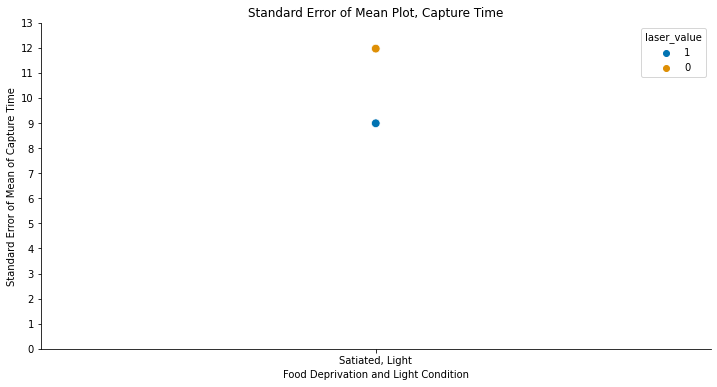

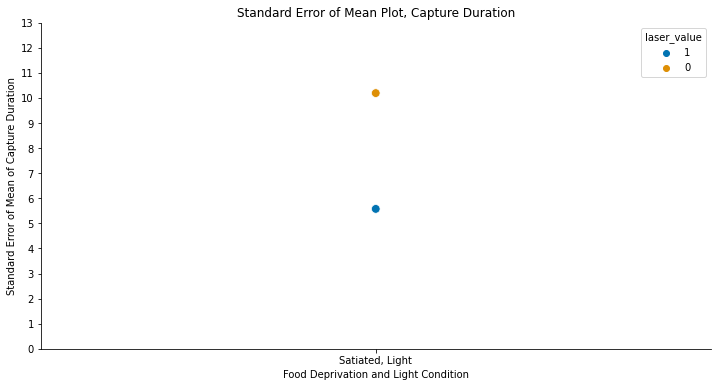

In [76]:
fig1= plt.figure(figsize=(12,6))
sns.scatterplot(data=sem_laser,x='condition', y='captureT', hue='laser_value', hue_order=hue_order, palette='colorblind', s=75)
plt.xticks([0],['Satiated, Light'])
plt.yticks(np.arange(0,14,1))
plt.ylabel('Standard Error of Mean of Capture Time')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Error of Mean Plot, Capture Time')
sns.despine()

fig2= plt.figure(figsize=(12,6))
sns.scatterplot(data=sem_laser,x='condition', y='capduration', hue='laser_value', hue_order=hue_order, palette='colorblind',s=75)
plt.xticks([0],['Satiated, Light'])
plt.yticks(np.arange(0,14,1))
plt.ylabel('Standard Error of Mean of Capture Duration')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Error of Mean Plot, Capture Duration')
sns.despine()